# Práctica APA - Evaluación preliminar del problema

## Aplicación del Aprendizaje Automático en la detección de pacientes con Hipotiroidismo

### Autores

* Pol Casacuberta Gil
* Marta Granero i Martí

### Elección del conjunto de datos

El objetivo de este informe es exponer de forma breve qué tema hemos escogido juntamente con un leve análisis del Dataset asociado al problema que hemos escogido para llevar a cargo la práctica.

El dataset a este problema se puede consultar en [OpenML (Open Machine Learning)](https://www.openml.org/search?type=data&status=any&id=1000), una plataforma abierta dónde se encuentran varios conjuntos de datos.

Para poder usar este Dataset, hemos comprobado debidamente que no se ha hecho ya un análisis a este problema usando el mismo, buscando notebooks existentes en [Kaggle](https://www.kaggle.com). 

Solamente hemos encontrado [4 notebooks](https://www.kaggle.com/datasets/kumar012/hypothyroid/code) donde se intenta resolver este problema aunque usando un Dataset distinto. Estos usan un conjunto de datos que cuenta con 26 columnas a diferencia de las 30 del Dataset que hemos escogido y carecen de las columnas que sí que se incluyen en el nuestro, como son: 
- **hypopituitary** - toma valores: f, t
- **psych** - toma valores: f, t
- **referral source** - toma valores: SVHC,other,SVI,STMW,SVHD
- **binaryClass** - variable respuesta que toma valores: P si es positivo, o N en otro caso

Además hemos comprobado que satisfaga todas las condiciones que se exigen, como siguen:

* El conjunto de datos tiene variables numéricas y categóricas
* El conjunto de datos no se ha generado sintéticamente
* El conjunto de datos tiene 30 variables(en estas se incluye la variable respuesta).
* Creemos que tenemos suficiente información sobre el problema para entender y analizar los resultados.
* El dataset no está preprocesado ya que cuenta con valores Nan i con valores faltantes en la mayoria de muestras del conjunto de datos.
* El conjunto de datos contiene más de 3772 muestras.
* El problema es lo suficientemente complejo ya que no hemos obtenido un acierto bueno usando Naïve bayes

#### Descripción del conjunto de datos

El conjunto de datos se compone por:

* Datos numéricos(floats/enteros)
* Datos categóricos 

Los datos numéricos pertenecen a las clases:

- 'age' : edad de los pacientes
- (T3,TSH,TT4)/TBG: hormonas/proteina
- FTI : índice
- T4U : rate

Los datos categóricos pertenecen a las demás clases.

#### Variable respuesta

Trataremos con un problema de clasificación binária dónde la variable respuesta será: **binaryClass**. Ésta toma valores categóricos: (P,N) en función de sí un paciente es positivo en Hipotiroidismo(P), o N si este no lo es.

#### Problemas específicos de los datos

* Este conjunto de datos, tiene muchos valores NaN para datos de hormonas y índices/rates que tiene un peso importante a la hora de decidir la variable respuesta. Ej: TSH, T3, T4U, TT4, FTI
* Junto con un outlier en la classe age 
* Asimismo tiene una variable(TBG) que todos sus valores son NaN. 
* Además si nos fijamos en los histogramas de todas las clases, podemos ver que la mayoria de sus clases que toman valores booleanos, excepto la classe 'sex', son desbalanceadas. 

### Descripción del problema

En esta práctica desarrollaremos varios modelos de clasificación usando distintos algoritmos de ML para resolver el problema real de detección de pacientes con Hipotiroidismo. Para poder resolver este problema real, a través de los distintos datos que incluye el dataset intentaremos clasficar los pacientes que tienen un cuadro clínico positivo/negtivo en hipotiroidismo. Veremos que el datset nos va a permitir segun los rates,índices y hormonas tiroideas classificar a los pacientes que tienen o no una reducida actividad de la glándula tiroides.

#### Carga de los datos

##### Librerías necesarias

In [9]:
from scipy.io import arff
from scipy.stats import normaltest
from sklearn.model_selection import train_test_split
from IPython.core.interactiveshell import InteractiveShell

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas import read_csv
import missingno as msno
from yellowbrick.target.feature_correlation import feature_correlation
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, GaussianNB, CategoricalNB, MultinomialNB
from sklearn.metrics import  ConfusionMatrixDisplay, classification_report,  RocCurveDisplay, PrecisionRecallDisplay, accuracy_score, f1_score, precision_score, recall_score
from yellowbrick.classifier.threshold import discrimination_threshold
from sklearn.model_selection import GridSearchCV
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display, HTML
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split,  KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from yellowbrick.regressor import AlphaSelection
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.target.feature_correlation import feature_correlation
from yellowbrick.classifier import precision_recall_curve
from sklearn.inspection import permutation_importance
from numpy.random import choice
from pandas import read_csv
from sklearn.neural_network import MLPClassifier, MLPRegressor
from skopt import BayesSearchCV
from sklearn.svm import LinearSVC, SVC
from sklearn.svm import LinearSVR, SVR
from sklearn.ensemble import RandomForestClassifier



In [2]:
show_html = lambda html: display(HTML(html))
InteractiveShell.ast_node_interactivity = "all"

data = arff.loadarff('hypothyroid.arff')
df = pd.DataFrame(data[0])

df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41.0,b'F',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b't',125.0,b't',1.14,b't',109.0,b'f',NaN,b'SVHC',b'P'
1,23.0,b'F',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b't',102.0,b'f',NaN,b'f',NaN,b'f',NaN,b'other',b'P'
2,46.0,b'M',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b't',109.0,b't',0.91,b't',120.0,b'f',NaN,b'other',b'P'
3,70.0,b'F',b't',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b't',175.0,b'f',NaN,b'f',NaN,b'f',NaN,b'other',b'P'
4,70.0,b'F',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b't',61.0,b't',0.87,b't',70.0,b'f',NaN,b'SVI',b'P'


In [3]:
#Aplicamos un mini procesamiento del Dataframe

#Primer tratamiento del DataFrame para pasar las columnas de tipo string a formato utf8, ya que sino teníamos b'f'
columnes = df.applymap(lambda col: isinstance(col, bytes)).all(0)
columnes = df.columns[columnes]
df.loc[:, columnes] = df[columnes].applymap(lambda col: col.decode("utf-8", errors='ignore'))

#Cambiamos los valors 'f', 't' por tipos booleanos, False y True resp.
df.replace({'t': 1, 'f': 0}, inplace=True)

df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41.0,F,0,0,0,0,0,0,0,0,...,1,125.0,1,1.14,1,109.0,0,NaN,SVHC,P
1,23.0,F,0,0,0,0,0,0,0,0,...,1,102.0,0,NaN,0,NaN,0,NaN,other,P
2,46.0,M,0,0,0,0,0,0,0,0,...,1,109.0,1,0.91,1,120.0,0,NaN,other,P
3,70.0,F,1,0,0,0,0,0,0,0,...,1,175.0,0,NaN,0,NaN,0,NaN,other,P
4,70.0,F,0,0,0,0,0,0,0,0,...,1,61.0,1,0.87,1,70.0,0,NaN,SVI,P


#### Estadística descriptiva

In [4]:
#Damos un primer vistazo a los datos y vemos que tenemos valors muchos NaN
df.describe(include='all').T

#También tenemos muchos missing values, marcados con '?', p.ej:
df.sex.unique()
df.TBG.unique()
df.TBG.count()

#Reordenamos y ponemos la variable respuesta primero
columnes = list(df.columns)
columnes.remove('binaryClass')
columnes.insert(0, 'binaryClass')
df = df.reindex(columns=columnes)

df.head()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,3771.0,NaN,NaN,NaN,51.735879,20.084958,1.0,36.0,54.0,67.0,455.0
sex,3772,3,F,2480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
on thyroxine,3772.0,NaN,NaN,NaN,0.123012,0.328494,0.0,0.0,0.0,0.0,1.0
query on thyroxine,3772.0,NaN,NaN,NaN,0.013256,0.114382,0.0,0.0,0.0,0.0,1.0
on antithyroid medication,3772.0,NaN,NaN,NaN,0.0114,0.106174,0.0,0.0,0.0,0.0,1.0
sick,3772.0,NaN,NaN,NaN,0.038971,0.193552,0.0,0.0,0.0,0.0,1.0
pregnant,3772.0,NaN,NaN,NaN,0.014051,0.117716,0.0,0.0,0.0,0.0,1.0
thyroid surgery,3772.0,NaN,NaN,NaN,0.014051,0.117716,0.0,0.0,0.0,0.0,1.0
I131 treatment,3772.0,NaN,NaN,NaN,0.015642,0.124101,0.0,0.0,0.0,0.0,1.0
query hypothyroid,3772.0,NaN,NaN,NaN,0.062036,0.241253,0.0,0.0,0.0,0.0,1.0


array(['F', 'M', '?'], dtype=object)

array([nan])

0

,binaryClass,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source
0,P,41.0,F,0,0,0,0,0,0,0,...,2.5,1,125.0,1,1.14,1,109.0,0,NaN,SVHC
1,P,23.0,F,0,0,0,0,0,0,0,...,2.0,1,102.0,0,NaN,0,NaN,0,NaN,other
2,P,46.0,M,0,0,0,0,0,0,0,...,NaN,1,109.0,1,0.91,1,120.0,0,NaN,other
3,P,70.0,F,1,0,0,0,0,0,0,...,1.9,1,175.0,0,NaN,0,NaN,0,NaN,other
4,P,70.0,F,0,0,0,0,0,0,0,...,1.2,1,61.0,1,0.87,1,70.0,0,NaN,SVI


#### Visualización básica

NormaltestResult(statistic=2297.2359679721785, pvalue=0.0)
NormaltestResult(statistic=1281.283371012964, pvalue=5.927220820727865e-279)


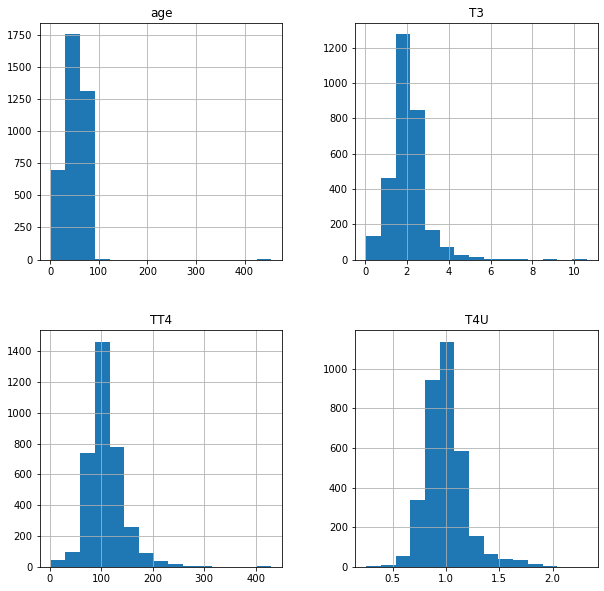

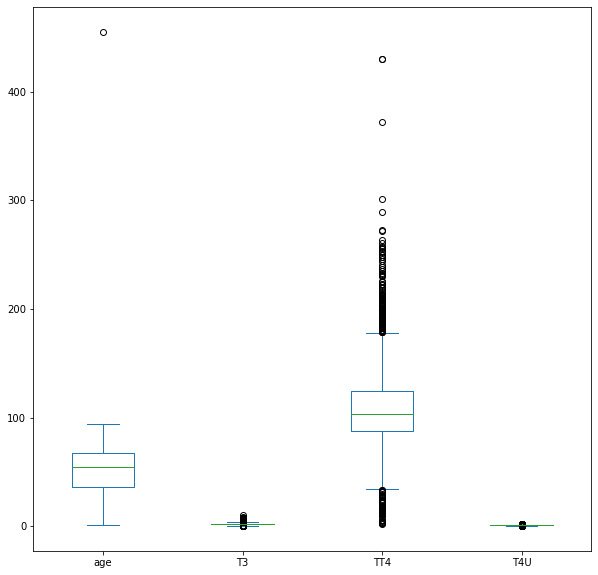

In [5]:
#Visualizamos algunos atributos
df.loc[:,['age', 'T3', 'TT4', 'T4U']].hist(bins=15, figsize=(10,10));

#Comprobamos si las variables numéricas siguen una distribución Normal.
print(normaltest(df['age'], nan_policy='omit'))
print(normaltest(df['T3'], nan_policy='omit'))


df.loc[:,['age', 'T3', 'TT4', 'T4U']].plot.box(figsize=(10,10));

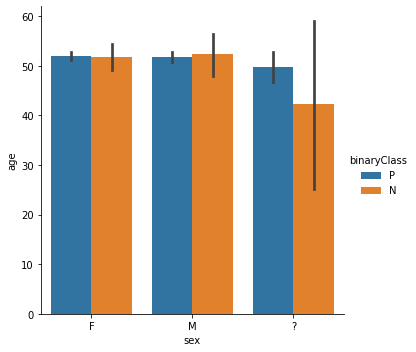

In [6]:
grafic = sns.catplot(data=df, kind="bar", x="sex", y="age", hue="binaryClass")

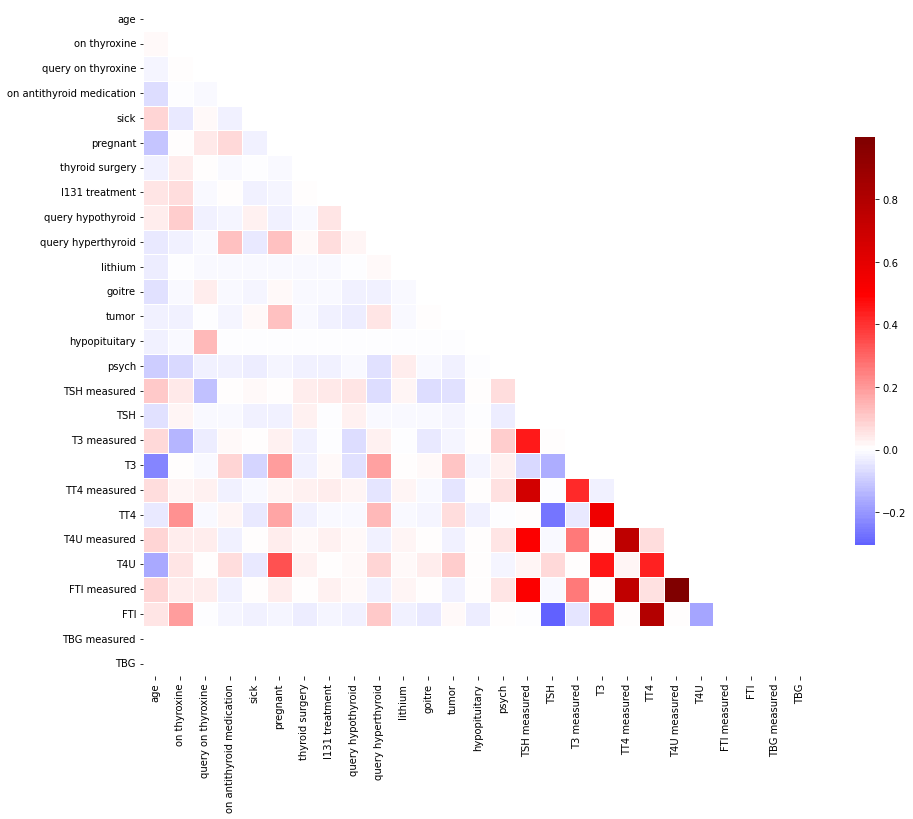

In [7]:
#Correlación entre distintas variables
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.subplots(figsize=(15, 15))
sns.heatmap(corr, mask=mask, cmap='seismic',  center=0, square=True, linewidths=.8, cbar_kws={"shrink": .5});

#### Partición del Dataset

In [8]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

df_train.shape, df_test.shape

((3017, 30), (755, 30))

#### Preprocesamiento del Dataset

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3017 entries, 2661 to 3174
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   binaryClass                3017 non-null   object 
 1   age                        3016 non-null   float64
 2   sex                        3017 non-null   object 
 3   on thyroxine               3017 non-null   int64  
 4   query on thyroxine         3017 non-null   int64  
 5   on antithyroid medication  3017 non-null   int64  
 6   sick                       3017 non-null   int64  
 7   pregnant                   3017 non-null   int64  
 8   thyroid surgery            3017 non-null   int64  
 9   I131 treatment             3017 non-null   int64  
 10  query hypothyroid          3017 non-null   int64  
 11  query hyperthyroid         3017 non-null   int64  
 12  lithium                    3017 non-null   int64  
 13  goitre                     3017 non-null   in

In [10]:
#Contamos cuantos valores perdidos con NaN tenemos:
df_train.isna().sum()

binaryClass                     0
age                             1
sex                             0
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           297
T3 measured                     0
T3                            609
TT4 measured                    0
TT4                           184
T4U measured                    0
T4U                           310
FTI measured                    0
FTI                           308
TBG measured                    0
TBG                          3017
referral sourc

<AxesSubplot:>

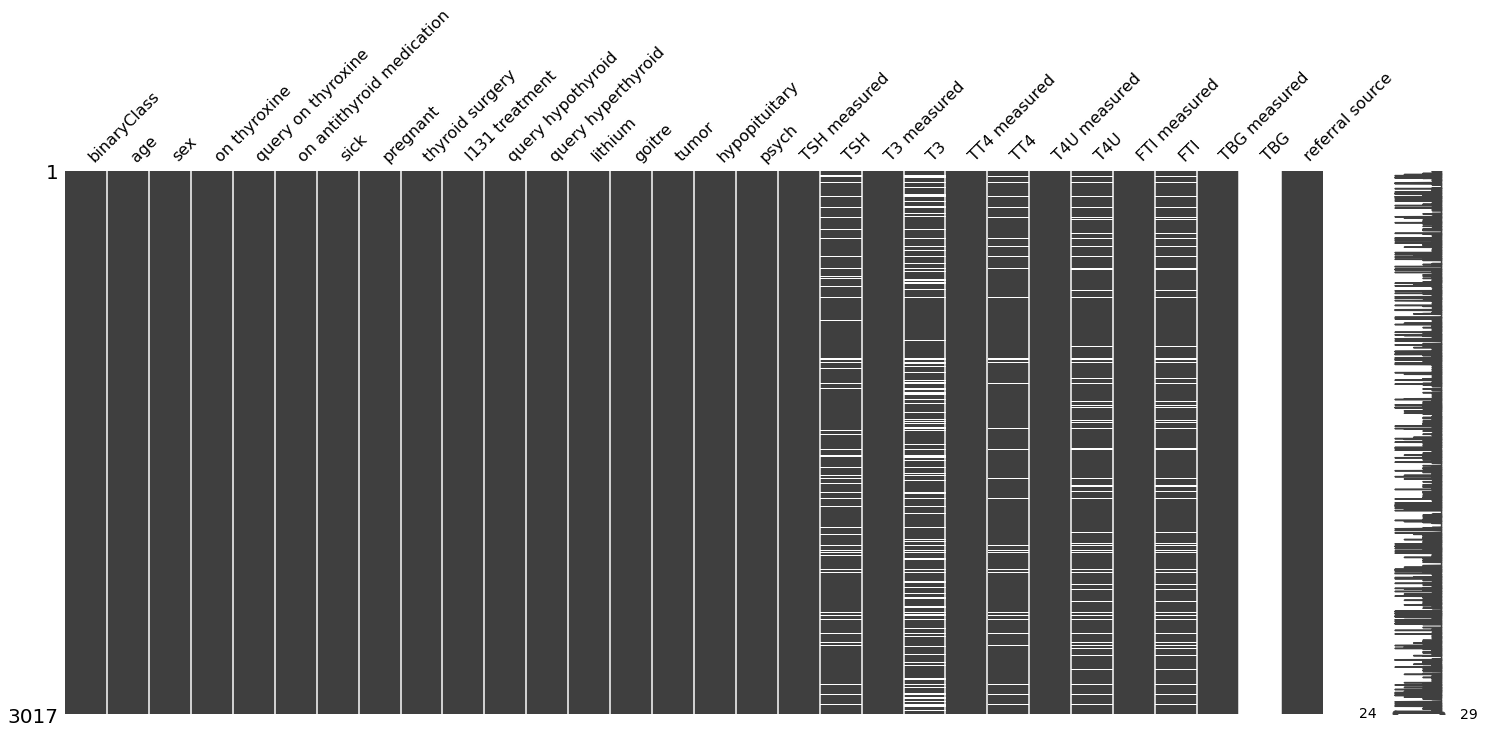

In [11]:
msno.matrix(df_train)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3016 entries, 2661 to 3174
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   binaryClass                3016 non-null   object 
 1   age                        3016 non-null   float64
 2   sex                        3016 non-null   object 
 3   on thyroxine               3016 non-null   int64  
 4   query on thyroxine         3016 non-null   int64  
 5   on antithyroid medication  3016 non-null   int64  
 6   sick                       3016 non-null   int64  
 7   pregnant                   3016 non-null   int64  
 8   thyroid surgery            3016 non-null   int64  
 9   I131 treatment             3016 non-null   int64  
 10  query hypothyroid          3016 non-null   int64  
 11  query hyperthyroid         3016 non-null   int64  
 12  lithium                    3016 non-null   int64  
 13  goitre                     3016 non-null   in

/var/folders/s1/h3mlm3qx719csw5jbkn6fcbh0000gn/T/ipykernel_2681/4233790963.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_train[~(small_outliers | big_outliers)].boxplot(column='age',ax=axes[0]);
/var/folders/s1/h3mlm3qx719csw5jbkn6fcbh0000gn/T/ipykernel_2681/4233790963.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_train[~(small_outliers | big_outliers)]['age'].plot.kde().set_xlim(left=-10);


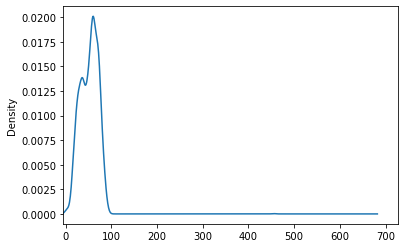

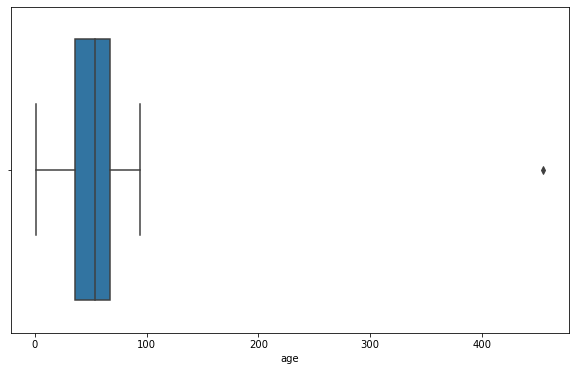

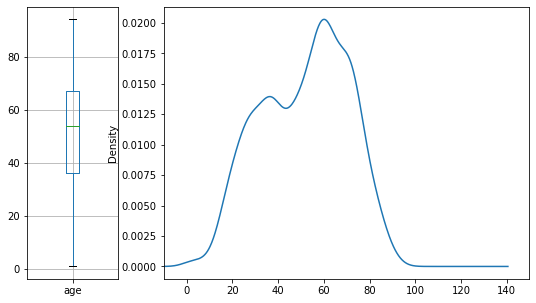

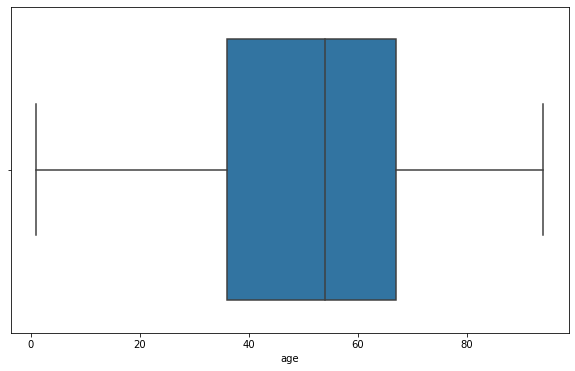

In [12]:
#Hemos de tratar los atributos:binaryClass, age, sex, TSH, T3, T4U, TT4, FTI, TBG y referral source

#age
df_train['age'].plot.kde().set_xlim(left=-5)
df_train['age'].mean()
df_train['age'].std()

df_train['age'].fillna(value=df_train['age'].mean(), inplace=True)

#outlier detectado en la columna de age, quitamos la fila del outlier:
plt.figure(figsize=(10,6));
sns.boxplot(data=df_train, x="age");

Q1 = df_train['age'].quantile(0.25)
Q3 = df_train['age'].quantile(0.75)
IQR = Q3 - Q1

Q1, Q3, IQR

small_outliers = df_train['age'] < (Q1 - 1.5 * IQR)
big_outliers = df_train['age'] > (Q3 + 1.5 * IQR)

sum(small_outliers), sum(big_outliers)

df_train['age'] [small_outliers | big_outliers].head()
df_train.drop([1364], inplace=True)
df_train.info()

#quitamos los outliers
fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
df_train[~(small_outliers | big_outliers)].boxplot(column='age',ax=axes[0]);
df_train[~(small_outliers | big_outliers)]['age'].plot.kde().set_xlim(left=-10);

df_train['age'].mean()
df_train['age'].std()

#Lo hemos quitado exitosamente
plt.figure(figsize=(10,6));
sns.boxplot(data=df_train, x="age");

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3016 entries, 2661 to 3174
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   binaryClass                3016 non-null   object 
 1   age                        3016 non-null   float64
 2   sex                        3016 non-null   object 
 3   on thyroxine               3016 non-null   int64  
 4   query on thyroxine         3016 non-null   int64  
 5   on antithyroid medication  3016 non-null   int64  
 6   sick                       3016 non-null   int64  
 7   pregnant                   3016 non-null   int64  
 8   thyroid surgery            3016 non-null   int64  
 9   I131 treatment             3016 non-null   int64  
 10  query hypothyroid          3016 non-null   int64  
 11  query hyperthyroid         3016 non-null   int64  
 12  lithium                    3016 non-null   int64  
 13  goitre                     3016 non-null   in

In [14]:
df_train.isna().sum()

binaryClass                     0
age                             0
sex                             0
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           297
T3 measured                     0
T3                            609
TT4 measured                    0
TT4                           184
T4U measured                    0
T4U                           310
FTI measured                    0
FTI                           308
TBG measured                    0
TBG                          3016
referral sourc

In [15]:
#tratamos la columna TBG
df_train.drop('TBG', inplace=True, axis=1)
df_train.info()
df_train.isna().sum()

#tratamos la columna referral source
df_train.drop('referral source', inplace=True, axis=1)
df_train.info()
df_train.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3016 entries, 2661 to 3174
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   binaryClass                3016 non-null   object 
 1   age                        3016 non-null   float64
 2   sex                        3016 non-null   object 
 3   on thyroxine               3016 non-null   int64  
 4   query on thyroxine         3016 non-null   int64  
 5   on antithyroid medication  3016 non-null   int64  
 6   sick                       3016 non-null   int64  
 7   pregnant                   3016 non-null   int64  
 8   thyroid surgery            3016 non-null   int64  
 9   I131 treatment             3016 non-null   int64  
 10  query hypothyroid          3016 non-null   int64  
 11  query hyperthyroid         3016 non-null   int64  
 12  lithium                    3016 non-null   int64  
 13  goitre                     3016 non-null   in

binaryClass                    0
age                            0
sex                            0
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                          297
T3 measured                    0
T3                           609
TT4 measured                   0
TT4                          184
T4U measured                   0
T4U                          310
FTI measured                   0
FTI                          308
TBG measured                   0
referral source                0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3016 entries, 2661 to 3174
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   binaryClass                3016 non-null   object 
 1   age                        3016 non-null   float64
 2   sex                        3016 non-null   object 
 3   on thyroxine               3016 non-null   int64  
 4   query on thyroxine         3016 non-null   int64  
 5   on antithyroid medication  3016 non-null   int64  
 6   sick                       3016 non-null   int64  
 7   pregnant                   3016 non-null   int64  
 8   thyroid surgery            3016 non-null   int64  
 9   I131 treatment             3016 non-null   int64  
 10  query hypothyroid          3016 non-null   int64  
 11  query hyperthyroid         3016 non-null   int64  
 12  lithium                    3016 non-null   int64  
 13  goitre                     3016 non-null   in

binaryClass                    0
age                            0
sex                            0
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                          297
T3 measured                    0
T3                           609
TT4 measured                   0
TT4                          184
T4U measured                   0
T4U                          310
FTI measured                   0
FTI                          308
TBG measured                   0
dtype: int64

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'on thyroxine'}>,
        <AxesSubplot:title={'center':'query on thyroxine'}>,
        <AxesSubplot:title={'center':'on antithyroid medication'}>,
        <AxesSubplot:title={'center':'sick'}>],
       [<AxesSubplot:title={'center':'pregnant'}>,
        <AxesSubplot:title={'center':'thyroid surgery'}>,
        <AxesSubplot:title={'center':'I131 treatment'}>,
        <AxesSubplot:title={'center':'query hypothyroid'}>,
        <AxesSubplot:title={'center':'query hyperthyroid'}>],
       [<AxesSubplot:title={'center':'lithium'}>,
        <AxesSubplot:title={'center':'goitre'}>,
        <AxesSubplot:title={'center':'tumor'}>,
        <AxesSubplot:title={'center':'hypopituitary'}>,
        <AxesSubplot:title={'center':'psych'}>],
       [<AxesSubplot:title={'center':'TSH measured'}>,
        <AxesSubplot:title={'center':'TSH'}>,
        <AxesSubplot:title={'center':'T3 measured'}>,
        <AxesSubplot:title=

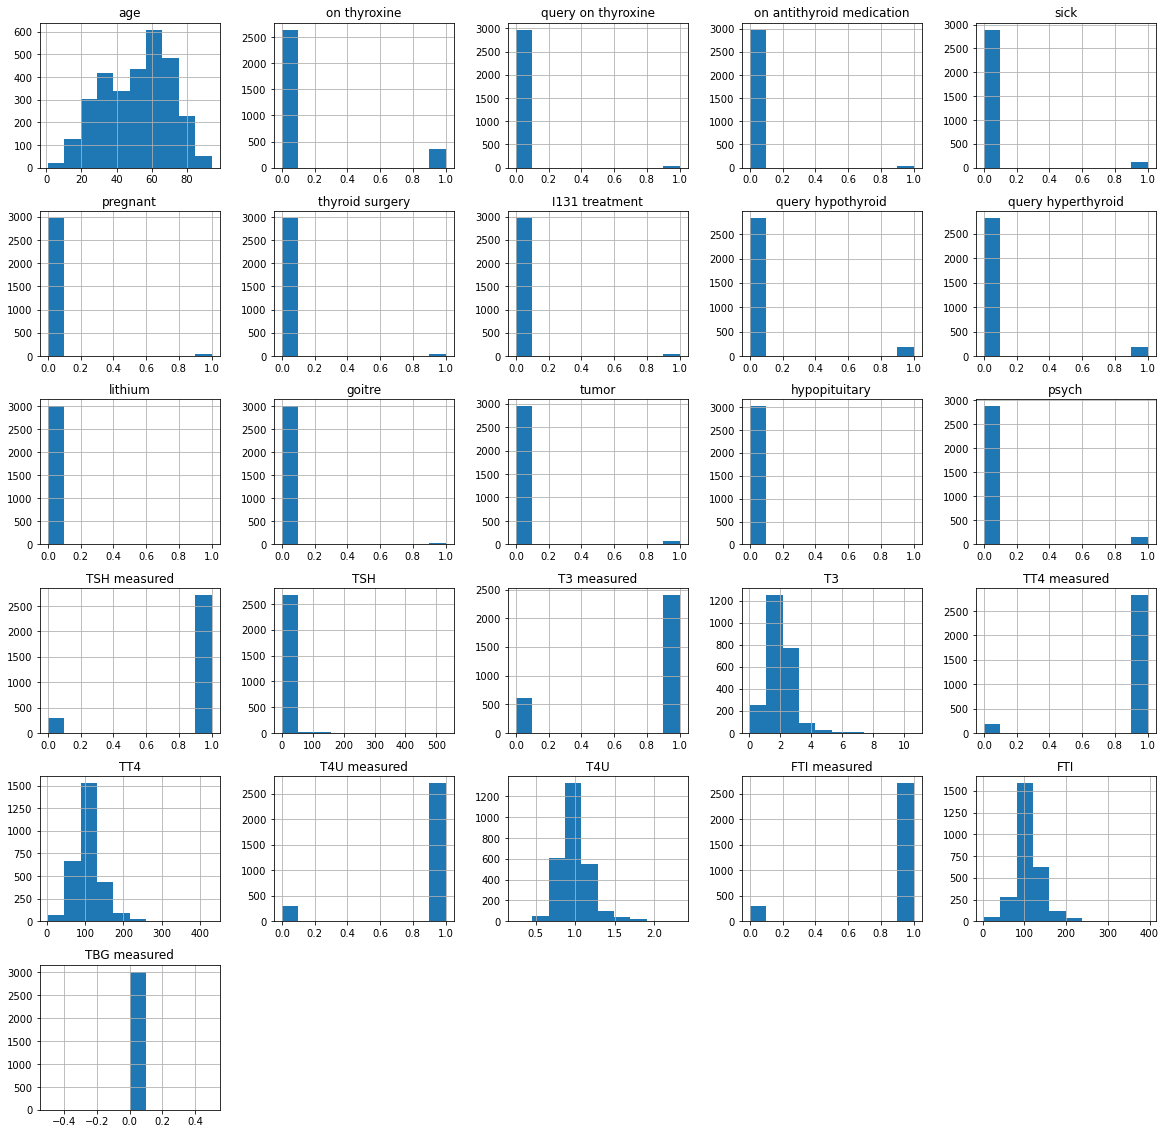

In [16]:
df_train.hist(figsize = (20,20))

In [17]:
df_train.describe()

,age,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,...,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured
count,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,...,2719.000000,3016.000000,2407.000000,3016.000000,2832.000000,3016.000000,2706.000000,3016.000000,2708.000000,3016.0
mean,51.601039,0.121021,0.012931,0.011605,0.039125,0.012931,0.012599,0.015584,0.061008,0.063660,...,5.063284,0.798077,2.013336,0.938992,108.431815,0.897215,0.993996,0.897878,110.629247,0.0
std,18.952459,0.326206,0.112996,0.107116,0.193924,0.112996,0.111556,0.123878,0.239385,0.244188,...,24.526872,0.401502,0.831512,0.239385,35.950941,0.303728,0.192990,0.302859,33.367757,0.0
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.005000,0.000000,0.050000,0.000000,3.000000,0.000000,0.250000,0.000000,3.000000,0.0
25%,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.485000,1.000000,1.600000,1.000000,87.750000,1.000000,0.880000,1.000000,93.000000,0.0
50%,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.400000,1.000000,2.000000,1.000000,103.000000,1.000000,0.970000,1.000000,107.000000,0.0
75%,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.700000,1.000000,2.300000,1.000000,124.000000,1.000000,1.080000,1.000000,124.000000,0.0
max,94.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,530.000000,1.000000,10.600000,1.000000,430.000000,1.000000,2.320000,1.000000,395.000000,0.0


In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3016 entries, 2661 to 3174
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   binaryClass                3016 non-null   object 
 1   age                        3016 non-null   float64
 2   sex                        3016 non-null   object 
 3   on thyroxine               3016 non-null   int64  
 4   query on thyroxine         3016 non-null   int64  
 5   on antithyroid medication  3016 non-null   int64  
 6   sick                       3016 non-null   int64  
 7   pregnant                   3016 non-null   int64  
 8   thyroid surgery            3016 non-null   int64  
 9   I131 treatment             3016 non-null   int64  
 10  query hypothyroid          3016 non-null   int64  
 11  query hyperthyroid         3016 non-null   int64  
 12  lithium                    3016 non-null   int64  
 13  goitre                     3016 non-null   in

In [19]:
#convertimos la variable de 'sex'
df_train['sex'].unique()
df_train['sex'].value_counts()

#La categoria ? nos muestra que no sabemos el sexo del paciente asi que supondremos que es una mujer ya que tenemos un valor para esta categoria mayor
df_train.replace(to_replace='?', inplace=True, value='F')
df_train['sex'] = df_train['sex'].astype('category').cat.codes

df_train['sex'].unique()
df_train['sex'].value_counts()

array(['F', 'M', '?'], dtype=object)

F    1977
M     916
?     123
Name: sex, dtype: int64

array([0, 1], dtype=int8)

0    2100
1     916
Name: sex, dtype: int64

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'on thyroxine'}>,
        <AxesSubplot:title={'center':'query on thyroxine'}>,
        <AxesSubplot:title={'center':'on antithyroid medication'}>],
       [<AxesSubplot:title={'center':'sick'}>,
        <AxesSubplot:title={'center':'pregnant'}>,
        <AxesSubplot:title={'center':'thyroid surgery'}>,
        <AxesSubplot:title={'center':'I131 treatment'}>,
        <AxesSubplot:title={'center':'query hypothyroid'}>],
       [<AxesSubplot:title={'center':'query hyperthyroid'}>,
        <AxesSubplot:title={'center':'lithium'}>,
        <AxesSubplot:title={'center':'goitre'}>,
        <AxesSubplot:title={'center':'tumor'}>,
        <AxesSubplot:title={'center':'hypopituitary'}>],
       [<AxesSubplot:title={'center':'psych'}>,
        <AxesSubplot:title={'center':'TSH measured'}>,
        <AxesSubplot:title={'center':'TSH'}>,
        <AxesSubplot:title={'center

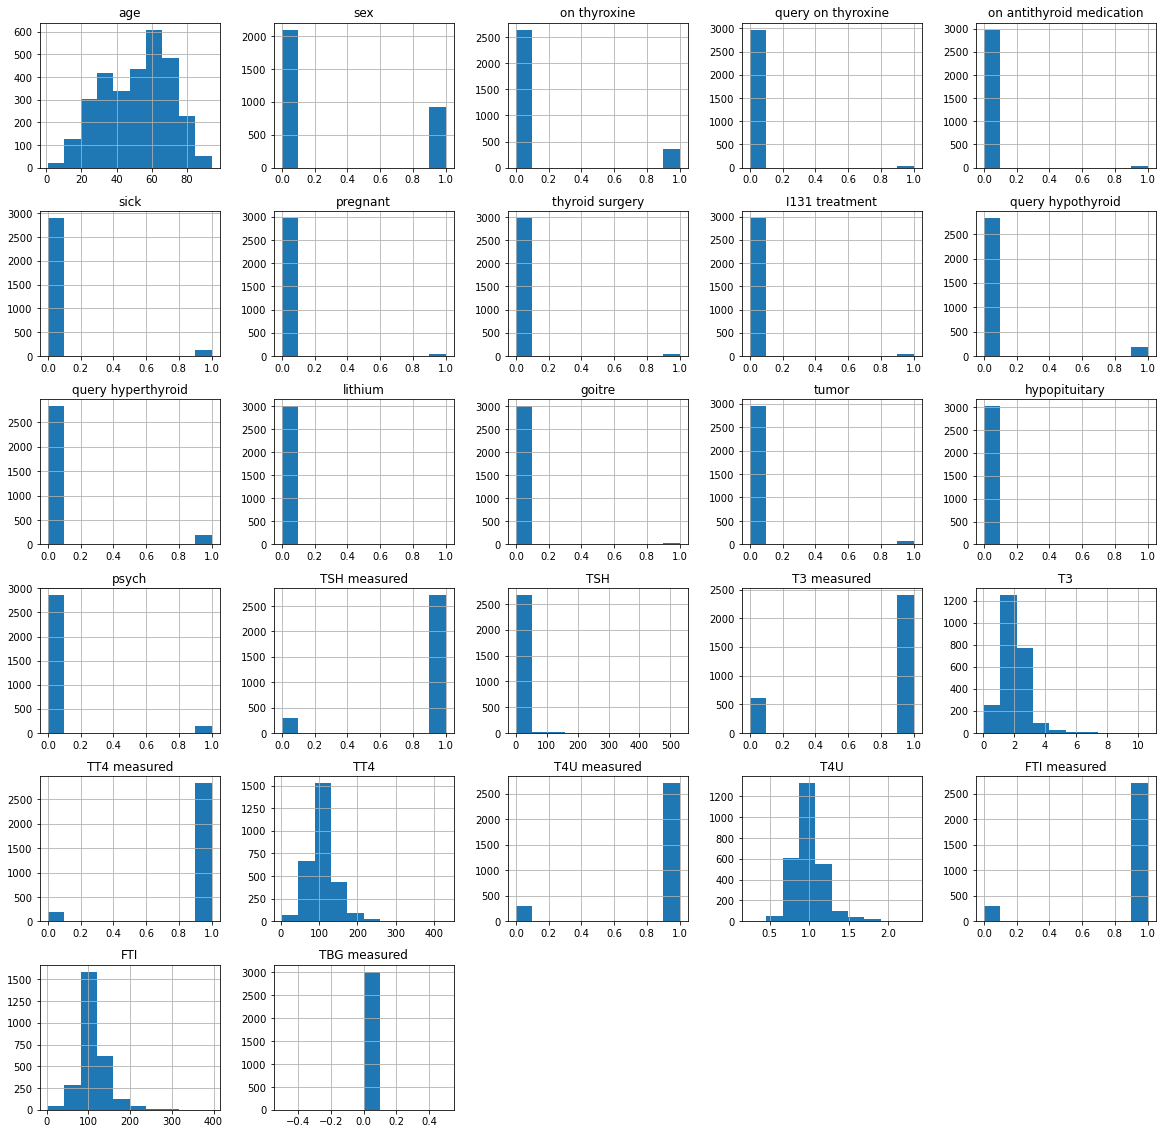

In [20]:
df_train.hist(figsize = (20,20))

In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3016 entries, 2661 to 3174
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   binaryClass                3016 non-null   object 
 1   age                        3016 non-null   float64
 2   sex                        3016 non-null   int8   
 3   on thyroxine               3016 non-null   int64  
 4   query on thyroxine         3016 non-null   int64  
 5   on antithyroid medication  3016 non-null   int64  
 6   sick                       3016 non-null   int64  
 7   pregnant                   3016 non-null   int64  
 8   thyroid surgery            3016 non-null   int64  
 9   I131 treatment             3016 non-null   int64  
 10  query hypothyroid          3016 non-null   int64  
 11  query hyperthyroid         3016 non-null   int64  
 12  lithium                    3016 non-null   int64  
 13  goitre                     3016 non-null   in

In [22]:
#convertimos la variable respuesta a binaria
df_train['binaryClass'].unique()
df_train['binaryClass'].value_counts()

df_train['binaryClass'] = df_train['binaryClass'].astype('category').cat.codes

df_train.info()

array(['P', 'N'], dtype=object)

P    2783
N     233
Name: binaryClass, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3016 entries, 2661 to 3174
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   binaryClass                3016 non-null   int8   
 1   age                        3016 non-null   float64
 2   sex                        3016 non-null   int8   
 3   on thyroxine               3016 non-null   int64  
 4   query on thyroxine         3016 non-null   int64  
 5   on antithyroid medication  3016 non-null   int64  
 6   sick                       3016 non-null   int64  
 7   pregnant                   3016 non-null   int64  
 8   thyroid surgery            3016 non-null   int64  
 9   I131 treatment             3016 non-null   int64  
 10  query hypothyroid          3016 non-null   int64  
 11  query hyperthyroid         3016 non-null   int64  
 12  lithium                    3016 non-null   int64  
 13  goitre                     3016 non-null   in

In [23]:
df_train.describe()

,binaryClass,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured
count,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,...,2719.000000,3016.000000,2407.000000,3016.000000,2832.000000,3016.000000,2706.000000,3016.000000,2708.000000,3016.0
mean,0.922745,51.601039,0.303714,0.121021,0.012931,0.011605,0.039125,0.012931,0.012599,0.015584,...,5.063284,0.798077,2.013336,0.938992,108.431815,0.897215,0.993996,0.897878,110.629247,0.0
std,0.267039,18.952459,0.459937,0.326206,0.112996,0.107116,0.193924,0.112996,0.111556,0.123878,...,24.526872,0.401502,0.831512,0.239385,35.950941,0.303728,0.192990,0.302859,33.367757,0.0
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.005000,0.000000,0.050000,0.000000,3.000000,0.000000,0.250000,0.000000,3.000000,0.0
25%,1.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.485000,1.000000,1.600000,1.000000,87.750000,1.000000,0.880000,1.000000,93.000000,0.0
50%,1.000000,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.400000,1.000000,2.000000,1.000000,103.000000,1.000000,0.970000,1.000000,107.000000,0.0
75%,1.000000,67.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.700000,1.000000,2.300000,1.000000,124.000000,1.000000,1.080000,1.000000,124.000000,0.0
max,1.000000,94.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,530.000000,1.000000,10.600000,1.000000,430.000000,1.000000,2.320000,1.000000,395.000000,0.0


array([[<AxesSubplot:title={'center':'binaryClass'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'on thyroxine'}>,
        <AxesSubplot:title={'center':'query on thyroxine'}>],
       [<AxesSubplot:title={'center':'on antithyroid medication'}>,
        <AxesSubplot:title={'center':'sick'}>,
        <AxesSubplot:title={'center':'pregnant'}>,
        <AxesSubplot:title={'center':'thyroid surgery'}>,
        <AxesSubplot:title={'center':'I131 treatment'}>],
       [<AxesSubplot:title={'center':'query hypothyroid'}>,
        <AxesSubplot:title={'center':'query hyperthyroid'}>,
        <AxesSubplot:title={'center':'lithium'}>,
        <AxesSubplot:title={'center':'goitre'}>,
        <AxesSubplot:title={'center':'tumor'}>],
       [<AxesSubplot:title={'center':'hypopituitary'}>,
        <AxesSubplot:title={'center':'psych'}>,
        <AxesSubplot:title={'center':'TSH measured'}>,
        <AxesSubplot:title=

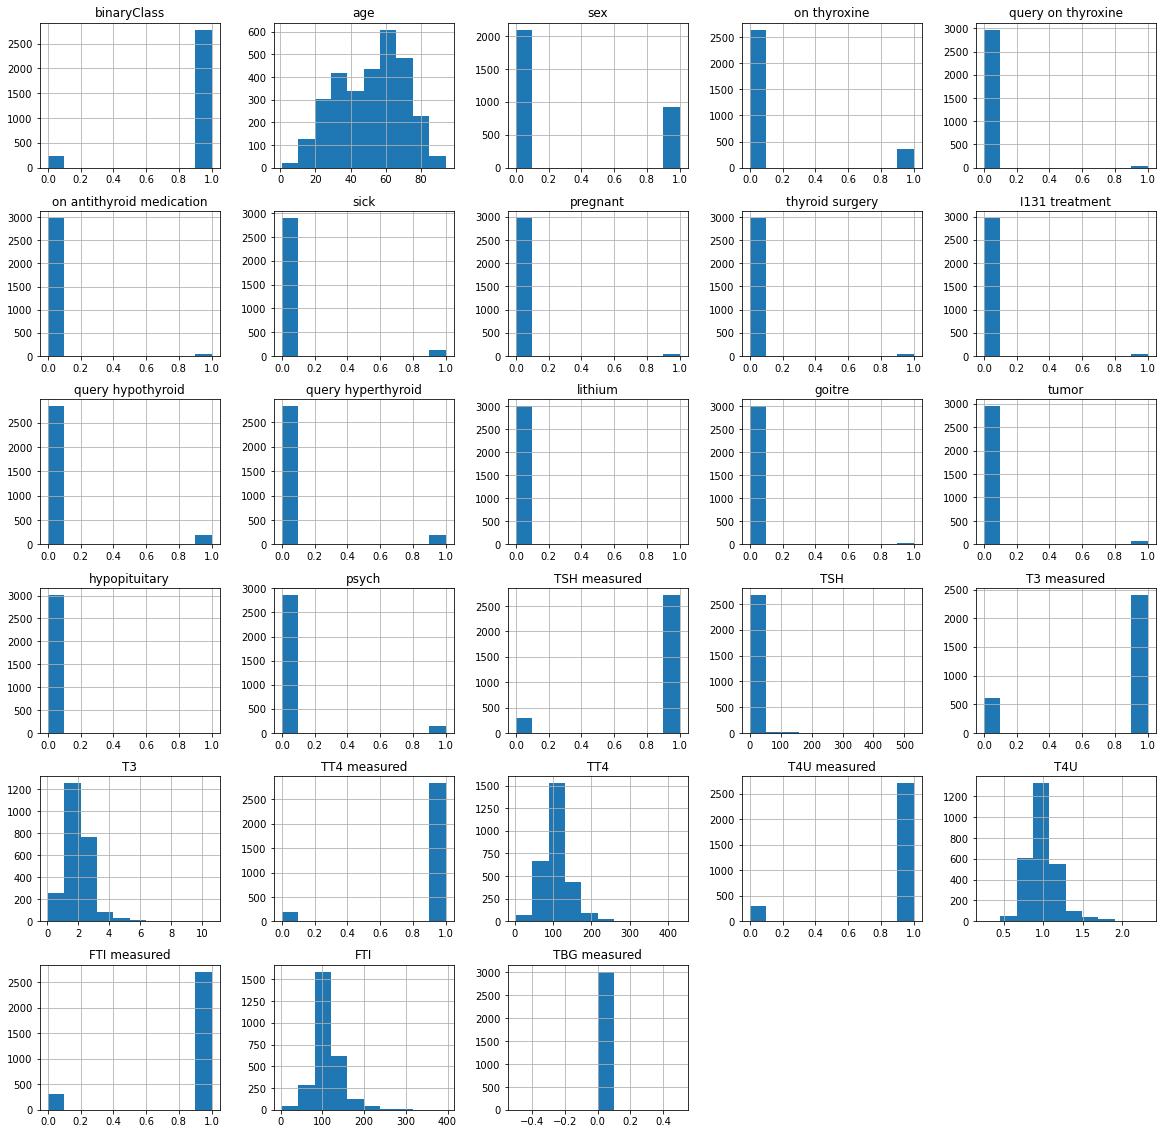

In [24]:
df_train.hist(figsize = (20,20))

In [25]:
#encara ens falta tractar els atributs: TSH, T3, T4U, TT4, FTI, per ara els missing values els inferirem amb la mediana de cadascun d'ells
df_train['TSH'].fillna(value=df_train['TSH'].mean(), inplace = True)
df_train['T3'].fillna(value=df_train['age'].mean(), inplace = True)
df_train['TT4'].fillna(value=df_train['age'].mean(), inplace = True)
df_train['T4U'].fillna(value=df_train['age'].mean(), inplace = True)
df_train['FTI'].fillna(value=df_train['age'].mean(), inplace = True)

In [26]:
#vale ja hem netejat el conjunt d'entrenament
df_train.describe()
df_train.isna().sum()

,binaryClass,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured
count,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,...,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.0
mean,0.922745,51.601039,0.303714,0.121021,0.012931,0.011605,0.039125,0.012931,0.012599,0.015584,...,5.063284,0.798077,12.026238,0.938992,104.964685,0.897215,6.195649,0.897878,104.601167,0.0
std,0.267039,18.952459,0.459937,0.326206,0.112996,0.107116,0.193924,0.112996,0.111556,0.123878,...,23.287520,0.401502,19.923398,0.239385,37.398838,0.303728,15.371884,0.302859,36.321633,0.0
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.005000,0.000000,0.050000,0.000000,3.000000,0.000000,0.250000,0.000000,3.000000,0.0
25%,1.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.600000,1.000000,1.700000,1.000000,84.000000,1.000000,0.890000,1.000000,86.000000,0.0
50%,1.000000,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.600000,1.000000,2.200000,1.000000,101.000000,1.000000,1.000000,1.000000,104.000000,0.0
75%,1.000000,67.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.800000,1.000000,3.200000,1.000000,123.000000,1.000000,1.140000,1.000000,122.000000,0.0
max,1.000000,94.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,530.000000,1.000000,51.601039,1.000000,430.000000,1.000000,51.601039,1.000000,395.000000,0.0


binaryClass                  0
age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
dtype: int64

#### Preprocesamiento del conjunto de test

In [27]:
df_test.isna().sum()
df_test.info()

binaryClass                    0
age                            0
sex                            0
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                           72
T3 measured                    0
T3                           160
TT4 measured                   0
TT4                           47
T4U measured                   0
T4U                           77
FTI measured                   0
FTI                           77
TBG measured                   0
TBG                          755
referral source                0
dtype: int

<class 'pandas.core.frame.DataFrame'>
Int64Index: 755 entries, 270 to 543
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   binaryClass                755 non-null    object 
 1   age                        755 non-null    float64
 2   sex                        755 non-null    object 
 3   on thyroxine               755 non-null    int64  
 4   query on thyroxine         755 non-null    int64  
 5   on antithyroid medication  755 non-null    int64  
 6   sick                       755 non-null    int64  
 7   pregnant                   755 non-null    int64  
 8   thyroid surgery            755 non-null    int64  
 9   I131 treatment             755 non-null    int64  
 10  query hypothyroid          755 non-null    int64  
 11  query hyperthyroid         755 non-null    int64  
 12  lithium                    755 non-null    int64  
 13  goitre                     755 non-null    int64

In [28]:
#quitamos referral source, convertimos la variable 'sex' y binaryClass
#tratamos la columna referral source
df_test.drop('TBG', inplace=True, axis=1)
df_test.drop('referral source', inplace=True, axis=1)

#convertimos la variable de 'sex'
df_test['sex'].unique()
df_test['sex'].value_counts()

#La categoria ? nos muestra que no sabemos el sexo del paciente asi que supondremos que es una mujer ya que tenemos un valor para esta categoria mayor
df_test.replace(to_replace='?', inplace=True, value='F')
df_test['sex'] = df_test['sex'].astype('category').cat.codes

df_test['sex'].unique()
df_test['sex'].value_counts()

df_test['binaryClass'].unique()
df_test['binaryClass'].value_counts()

df_test['binaryClass'] = df_test['binaryClass'].astype('category').cat.codes

#modificamos los nan que quedan de los atributos que son proteinas
df_test['TSH'].fillna(value=df_test['TSH'].mean(), inplace = True)
df_test['T3'].fillna(value=df_test['age'].mean(), inplace = True)
df_test['TT4'].fillna(value=df_test['age'].mean(), inplace = True)
df_test['T4U'].fillna(value=df_test['age'].mean(), inplace = True)
df_test['FTI'].fillna(value=df_test['age'].mean(), inplace = True)

df_test.info()

array(['F', 'M', '?'], dtype=object)

F    502
M    226
?     27
Name: sex, dtype: int64

array([0, 1], dtype=int8)

0    529
1    226
Name: sex, dtype: int64

array(['P', 'N'], dtype=object)

P    697
N     58
Name: binaryClass, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 755 entries, 270 to 543
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   binaryClass                755 non-null    int8   
 1   age                        755 non-null    float64
 2   sex                        755 non-null    int8   
 3   on thyroxine               755 non-null    int64  
 4   query on thyroxine         755 non-null    int64  
 5   on antithyroid medication  755 non-null    int64  
 6   sick                       755 non-null    int64  
 7   pregnant                   755 non-null    int64  
 8   thyroid surgery            755 non-null    int64  
 9   I131 treatment             755 non-null    int64  
 10  query hypothyroid          755 non-null    int64  
 11  query hyperthyroid         755 non-null    int64  
 12  lithium                    755 non-null    int64  
 13  goitre                     755 non-null    int64

array([[<AxesSubplot:title={'center':'binaryClass'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'on thyroxine'}>,
        <AxesSubplot:title={'center':'query on thyroxine'}>],
       [<AxesSubplot:title={'center':'on antithyroid medication'}>,
        <AxesSubplot:title={'center':'sick'}>,
        <AxesSubplot:title={'center':'pregnant'}>,
        <AxesSubplot:title={'center':'thyroid surgery'}>,
        <AxesSubplot:title={'center':'I131 treatment'}>],
       [<AxesSubplot:title={'center':'query hypothyroid'}>,
        <AxesSubplot:title={'center':'query hyperthyroid'}>,
        <AxesSubplot:title={'center':'lithium'}>,
        <AxesSubplot:title={'center':'goitre'}>,
        <AxesSubplot:title={'center':'tumor'}>],
       [<AxesSubplot:title={'center':'hypopituitary'}>,
        <AxesSubplot:title={'center':'psych'}>,
        <AxesSubplot:title={'center':'TSH measured'}>,
        <AxesSubplot:title=

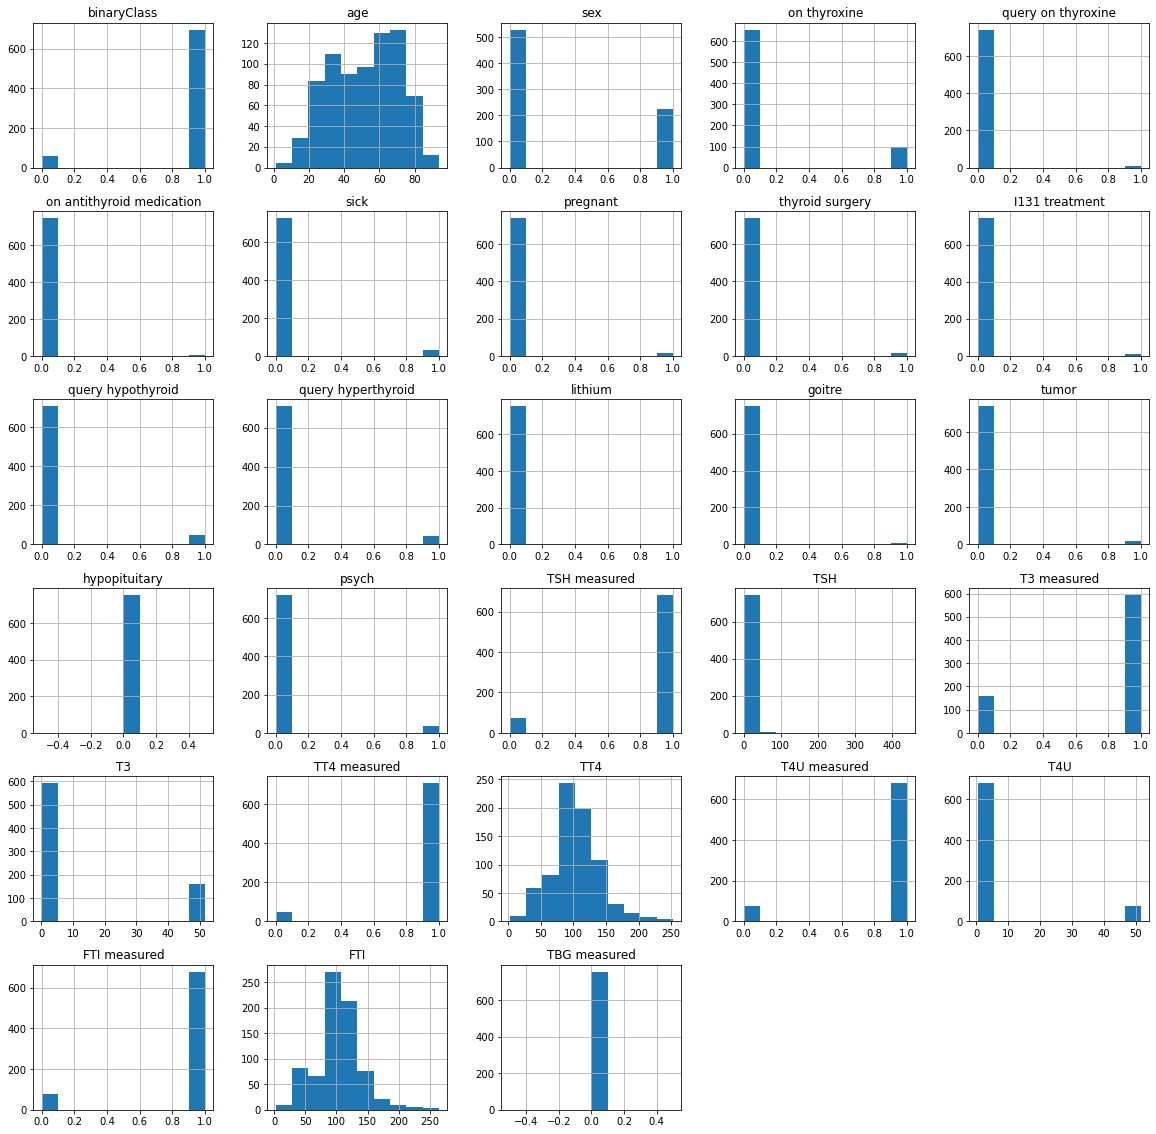

In [29]:
df_test.hist(figsize = (20,20))

In [30]:
#Guardem els datasets netejats a nous csv
df_train.to_csv('df_train.csv', index=False)
df_test.to_csv('df_test.csv', index=False)

## APLICACIÓN DE DISTINTOS MODELOS

In [80]:
#Conseguimos el csv de entrenamiento
X_train = read_csv('df_train.csv')
y_train = X_train['binaryClass']

X_train.drop('binaryClass', axis=1, inplace = True)

X_train
y_train

#Conseguimos el csv de test
X_test = read_csv('df_test.csv')
y_test = X_test['binaryClass']

X_test.drop('binaryClass', axis=1, inplace = True)

X_test
y_test

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured
0,65.0,0,1,0,0,0,0,0,0,0,...,0.400,0,51.601039,1,175.0,1,1.12,1,156.0,0
1,62.0,0,0,0,0,1,0,0,0,0,...,11.000,1,0.800000,1,73.0,1,0.74,1,98.0,0
2,27.0,0,0,0,0,0,0,0,0,0,...,1.700,1,1.900000,1,146.0,1,1.19,1,123.0,0
3,80.0,0,0,0,0,0,0,0,0,0,...,2.600,1,2.200000,1,97.0,1,1.04,1,94.0,0
4,28.0,0,0,0,1,0,0,0,0,0,...,0.300,1,2.900000,1,171.0,1,1.20,1,143.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3011,60.0,0,0,0,0,0,0,0,0,0,...,2.100,0,51.601039,1,127.0,1,1.01,1,126.0,0
3012,25.0,0,0,0,0,0,0,0,0,0,...,0.700,1,1.600000,1,94.0,1,0.93,1,101.0,0
3013,65.0,0,1,0,0,0,0,0,0,0,...,0.015,1,3.100000,1,168.0,1,0.98,1,171.0,0
3014,73.0,0,1,0,0,0,0,0,0,1,...,0.030,1,1.700000,1,127.0,1,0.89,1,143.0,0


0       1
1       0
2       1
3       1
4       1
       ..
3011    1
3012    1
3013    1
3014    1
3015    1
Name: binaryClass, Length: 3016, dtype: int64

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured
0,26.0,0,0,0,0,0,0,0,0,0,...,2.10,1,2.200000,1,95.0,1,1.000000,1,95.000000,0
1,26.0,0,0,0,0,0,0,0,0,0,...,6.20,0,51.740397,1,86.0,1,0.900000,1,95.000000,0
2,52.0,1,1,0,0,0,0,0,0,0,...,0.20,1,2.300000,1,116.0,1,0.940000,1,123.000000,0
3,25.0,0,0,0,0,0,0,0,0,0,...,2.00,1,2.200000,1,123.0,1,1.520000,1,81.000000,0
4,29.0,0,0,0,0,0,0,0,0,0,...,0.84,1,1.500000,1,100.0,1,0.740000,1,135.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,29.0,0,0,0,0,0,0,0,0,0,...,4.60,1,1.600000,1,97.0,1,1.120000,1,87.000000,0
751,28.0,0,0,0,0,0,0,0,0,0,...,3.40,1,1.900000,1,86.0,0,51.740397,0,51.740397,0
752,72.0,0,0,0,0,0,0,0,0,1,...,1.10,0,51.740397,1,131.0,1,0.500000,1,265.000000,0
753,35.0,0,1,0,0,0,0,0,0,0,...,1.90,1,1.800000,1,100.0,1,0.810000,1,123.000000,0


0      1
1      0
2      1
3      1
4      1
      ..
750    1
751    1
752    1
753    1
754    1
Name: binaryClass, Length: 755, dtype: int64

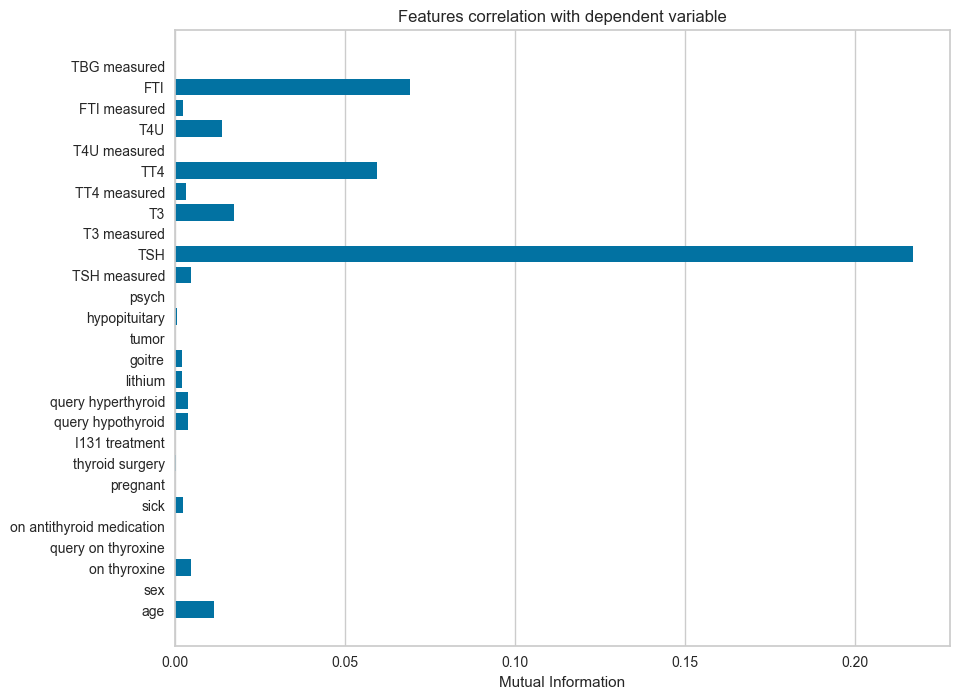

In [25]:
plt.figure(figsize=(10,8))
visualizer = feature_correlation(X_train, y_train, labels=list(X_train.columns),method='mutual_info-classification');

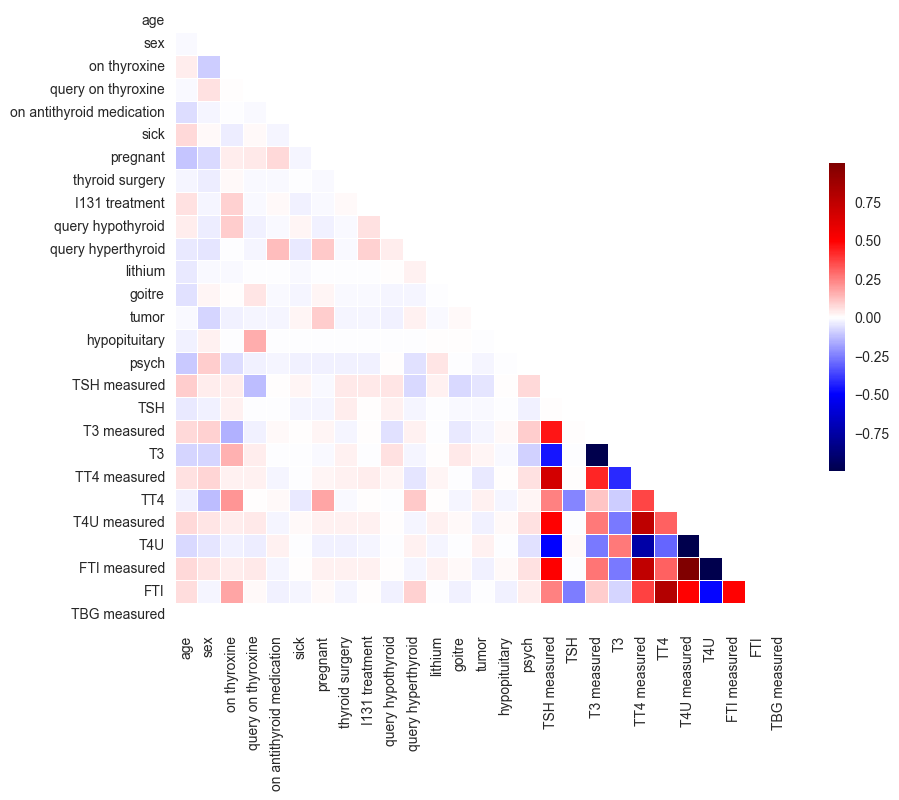

In [26]:
corr = X_train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=mask, cmap='seismic',  center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5});

/usr/local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4427: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


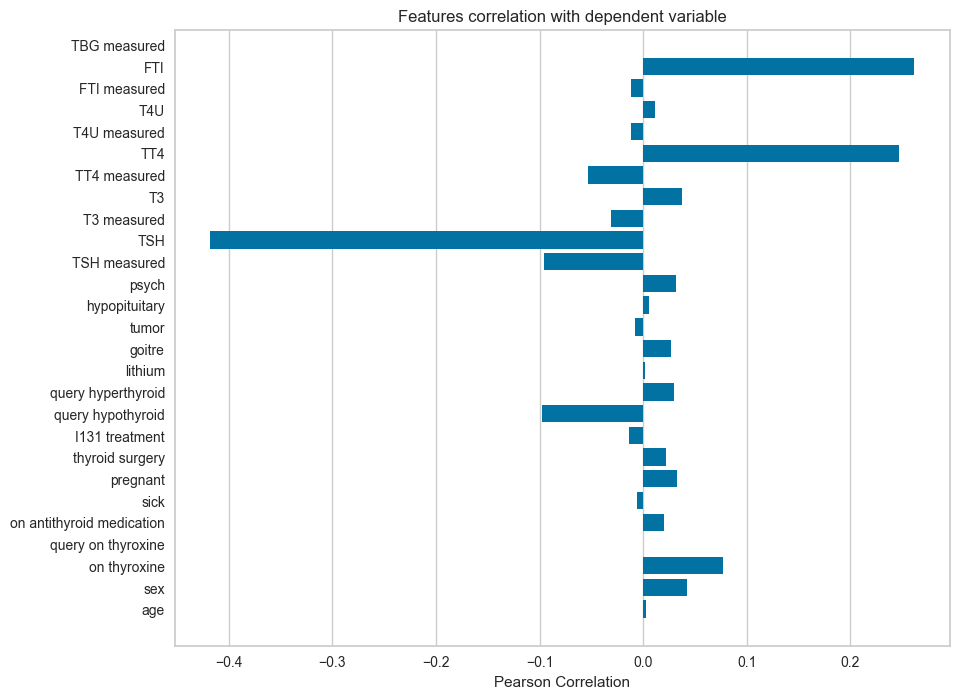

In [28]:
plt.figure(figsize=(10,8))
visualizer = feature_correlation(X_train, y_train, labels=list(X_train.columns),method='pearson');

In [30]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
pca = PCA().fit(X_train);

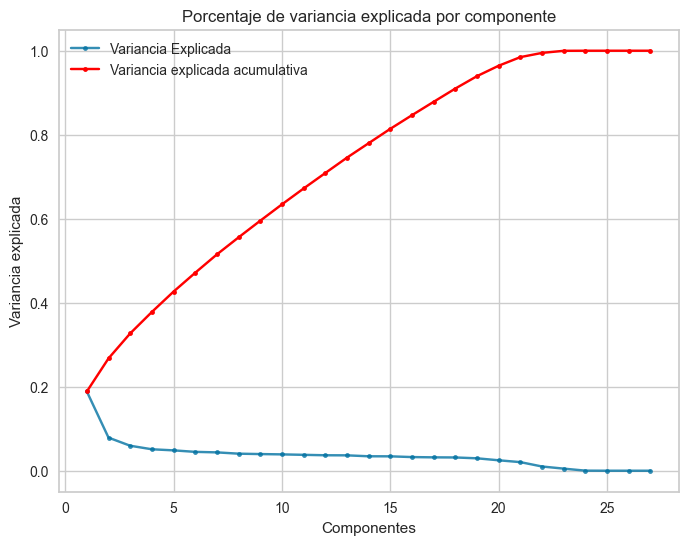

In [32]:
fig = plt.figure(figsize=(8,6));
plt.plot(range(1,len(pca.explained_variance_ratio_ )+1),pca.explained_variance_ratio_ ,alpha=0.8,marker='.',label="Variancia Explicada");
y_label = plt.ylabel('Variancia explicada');
x_label = plt.xlabel('Componentes');
plt.plot(range(1,len(pca.explained_variance_ratio_ )+1),
         np.cumsum(pca.explained_variance_ratio_),
         c='red',marker='.',
         label="Variancia explicada acumulativa");
plt.legend();
plt.title('Porcentaje de variancia explicada por componente');

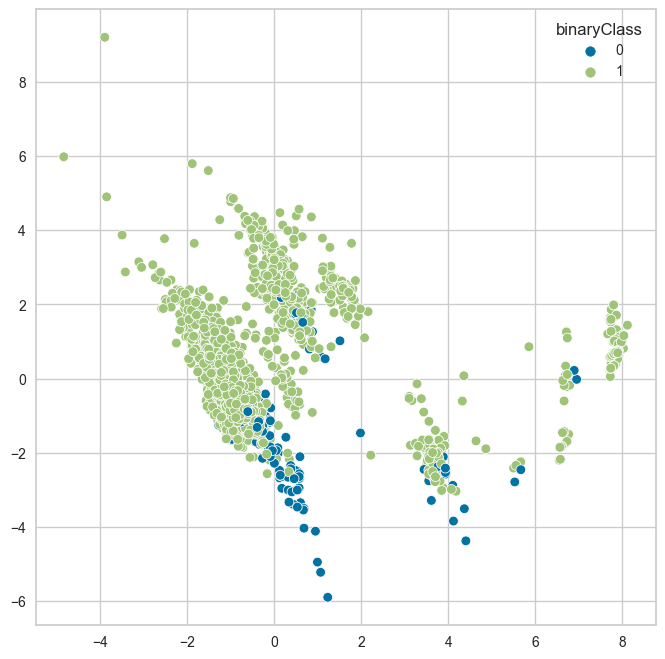

In [33]:
X_trans = pca.transform(X_train)
plt.figure(figsize=(8,8));
sns.scatterplot(x=X_trans[:,0], y=X_trans[:,1], hue=y_train);

/usr/local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


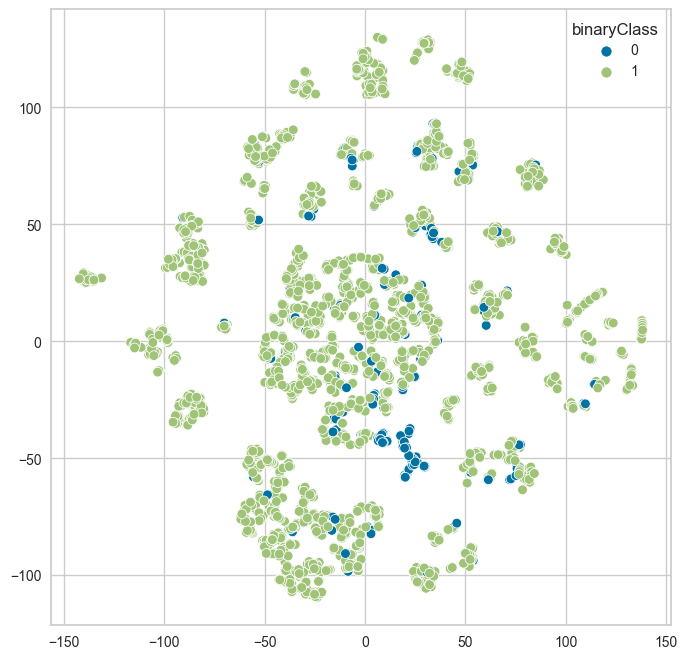

In [60]:

X_trans = TSNE(n_components=2, perplexity=10,n_iter=2000, init='pca').fit_transform(X_train)

fig = plt.figure(figsize=(8,8))
sns.scatterplot(x=X_trans[:,0], y=X_trans[:,1], hue=y_train);

In [36]:

lda = LinearDiscriminantAnalysis()
print(np.mean(cross_val_score(lda,X_train,y_train,cv=10)))

0.942301599524763


In [40]:

print(classification_report(lda_model.predict(X_test), y_test,target_names=['P', 'N']))

              precision    recall  f1-score   support

           P       0.26      1.00      0.41        15
           N       1.00      0.94      0.97       740

    accuracy                           0.94       755
   macro avg       0.63      0.97      0.69       755
weighted avg       0.99      0.94      0.96       755



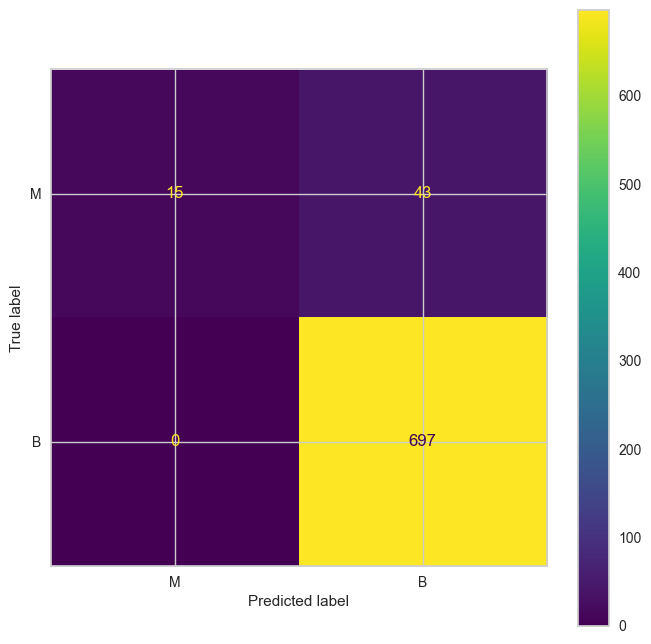

In [41]:
plt.figure(figsize=(8,8));
ConfusionMatrixDisplay.from_estimator(lda_model, X_test,y_test, display_labels=['M', 'B'], ax=plt.subplot());

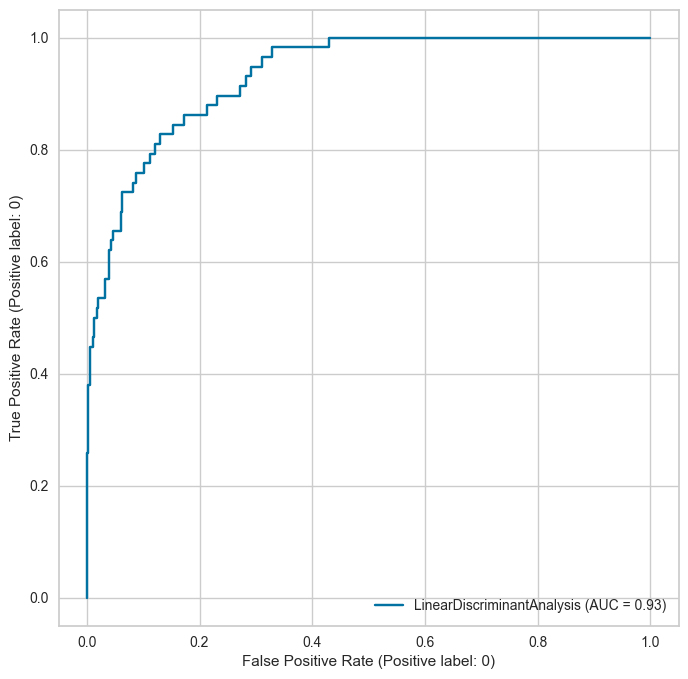

In [42]:
plt.figure(figsize=(8,8));
RocCurveDisplay.from_estimator(lda_model, X_test,y_test, pos_label=0, ax=plt.subplot());

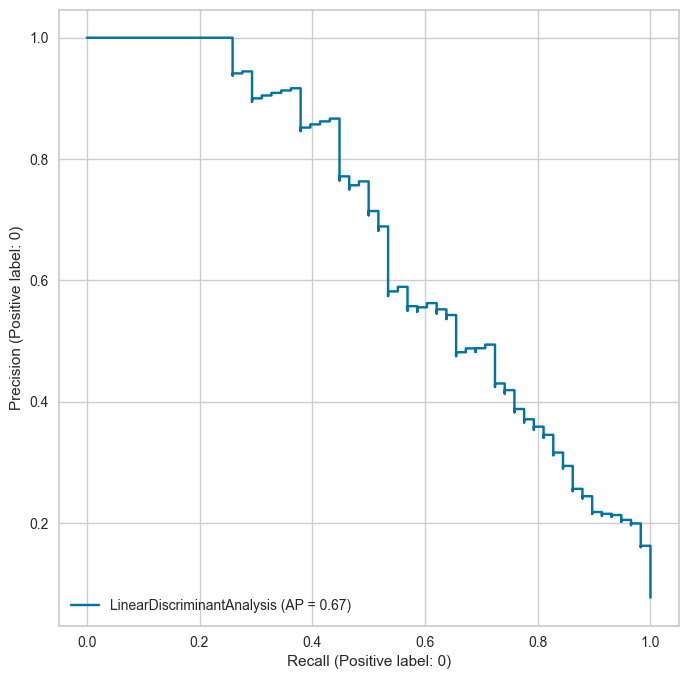

In [43]:
plt.figure(figsize=(8,8));
PrecisionRecallDisplay.from_estimator(lda_model, X_test,y_test, pos_label=0, ax=plt.subplot());

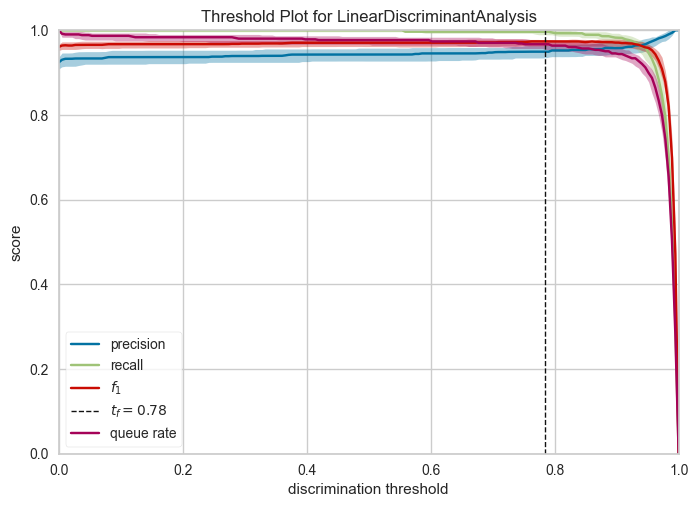

In [44]:

discrimination_threshold(lda_model, X_train, y_train, is_fitted=True);

### QDA

In [45]:
qda = QuadraticDiscriminantAnalysis()
print(np.mean(cross_val_score(qda,X_train,y_train,cv=10)))

0.1969538624012673


/usr/local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/site-packages/sklearn/disc

In [48]:
param = {'reg_param':np.linspace(0,1,21, endpoint=True)}
qda_gs =  GridSearchCV(qda,param,cv=10, n_jobs=-1, refit=True)
qda_gs.fit(X_train, y_train);

/usr/local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/site-packages/sklearn/disc

/usr/local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/site-packages/sklearn/disc

/usr/local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/site-packages/sklearn/disc

/usr/local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/site-packages/sklearn/disc

In [50]:

show_html(pd.DataFrame(qda_gs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
19,{'reg_param': 0.9500000000000001},0.945948,1
20,{'reg_param': 1.0},0.944957,2
18,{'reg_param': 0.9},0.942302,3
17,{'reg_param': 0.8500000000000001},0.938986,4
16,{'reg_param': 0.8},0.933020,5


In [51]:
print(classification_report(qda_gs.predict(X_test), y_test,target_names=['P', 'N']))

              precision    recall  f1-score   support

           P       0.26      1.00      0.41        15
           N       1.00      0.94      0.97       740

    accuracy                           0.94       755
   macro avg       0.63      0.97      0.69       755
weighted avg       0.99      0.94      0.96       755



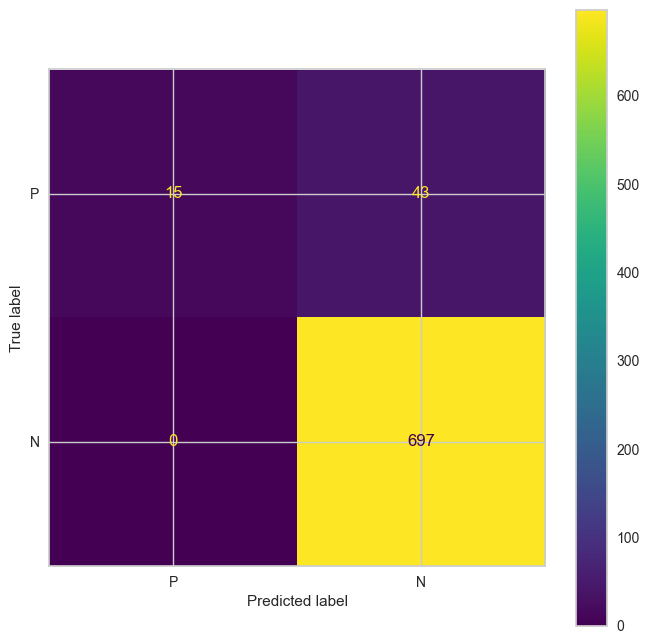

In [52]:
plt.figure(figsize=(8,8));
ConfusionMatrixDisplay.from_estimator(qda_gs, X_test,y_test, display_labels=['P', 'N'], ax=plt.subplot());

### REGRESIÓN LOGÍSTICA

In [53]:
lr = LogisticRegression(max_iter=1000)
print(np.mean(cross_val_score(lr,X_train,y_train,cv=10)))

0.9631944291654749


In [54]:
param = {'penalty':['l1', 'l2'], 'C':10**np.linspace(-4,4,21, endpoint=True)}
lr_gs =  GridSearchCV(lr,param,cv=10, n_jobs=-1, refit=True)
lr_gs.fit(X_train, y_train);

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
210 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
210 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 61, in _check_solver
    raise ValueError(
ValueError: So

In [55]:
show_html(pd.DataFrame(lr_gs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
33,"{'C': 251.18864315095823, 'penalty': 'l2'}",0.974801,1
35,"{'C': 630.9573444801943, 'penalty': 'l2'}",0.974801,1
29,"{'C': 39.81071705534978, 'penalty': 'l2'}",0.974470,3
31,"{'C': 100.0, 'penalty': 'l2'}",0.974470,3
41,"{'C': 10000.0, 'penalty': 'l2'}",0.974138,5


In [56]:
print(classification_report(lr_gs.predict(X_test), y_test,target_names=['P', 'N']))

              precision    recall  f1-score   support

           P       0.69      0.93      0.79        43
           N       1.00      0.97      0.99       712

    accuracy                           0.97       755
   macro avg       0.84      0.95      0.89       755
weighted avg       0.98      0.97      0.97       755



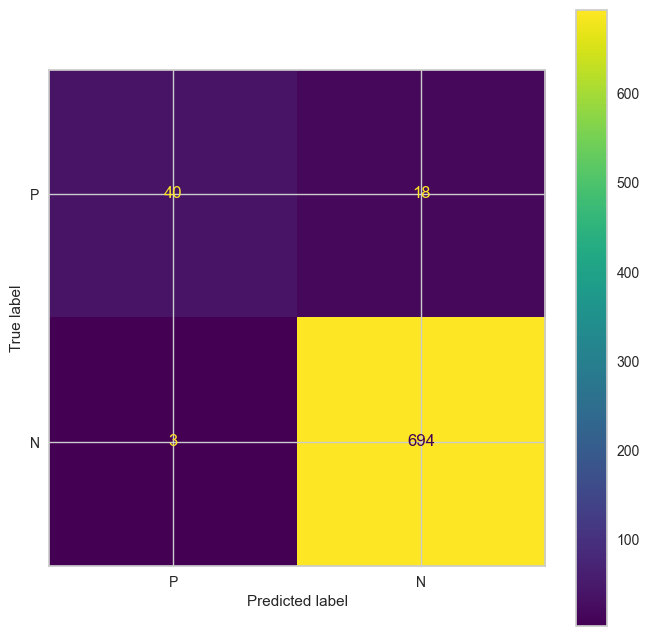

In [57]:
plt.figure(figsize=(8,8));
ConfusionMatrixDisplay.from_estimator(lr_gs, X_test,y_test, display_labels=['P', 'N'], ax=plt.subplot());

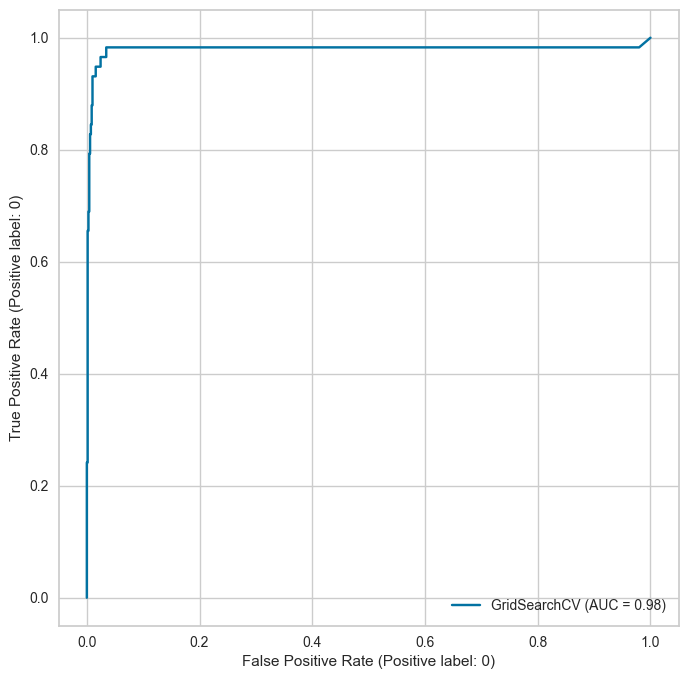

In [58]:
plt.figure(figsize=(8,8));
RocCurveDisplay.from_estimator(lr_gs, X_test,y_test, pos_label=0, ax=plt.subplot());

### REGRESIÓN LINEAL

In [4]:
# Instanciamos el modelo LinearRegression 
lr = LinearRegression();

# Ajustamos con los datos de entrenamiento con el método fit
lr.fit(X_train,y_train);

# Predecimos con el método predict 
y_pred = lr.predict(X_train);

In [5]:
weights = lr.coef_
intercept = lr.intercept_
# Podemos acceder a información del modelo, como los pesos.
print('Coeficientes: \n', weights[:10])
print('Interceptor: \n', intercept)

Coeficientes: 
 [ 0.00014888  0.03040578  0.0548478  -0.05558581  0.04403694  0.0044344
  0.04039132  0.11936589 -0.01669532 -0.0839118 ]
Interceptor: 
 7.131512944500977


In [13]:
cross_val_metrics = pd.DataFrame(columns=['MSE', 'norm_MSE', 'R2'])

kf = KFold(n_splits=10)
i=1
for train_index, test_index in kf.split(X_train):
    print('Split {}: \n\tTest Folds: [{}] \n\tTrain Folds {}'.format(i, i, [j for j in range(1,11) if j != i]));
    
    x_train_fold = X_train.values[train_index]
    y_train_fold = y_train.values[train_index]
    x_test_fold = X_train.values[test_index,:]
    y_test_fold = y_train.values[test_index]
    
    lr = LinearRegression().fit(x_train_fold,y_train_fold)
    y_pred_fold = lr.predict(x_test_fold)
    fold_mse =mean_squared_error(y_test_fold, y_pred_fold)
    fold_nmse =  1-r2_score(y_test_fold, y_pred_fold)
    fold_r2 = r2_score(y_test_fold, y_pred_fold)
    print(f'\tMSE: {fold_mse:3.3f} NMSE: {fold_nmse:3.3f} R2: {fold_r2:3.3f}')

    cross_val_metrics.loc[f'Fold {i}', :] = [fold_mse,fold_nmse, fold_r2]
    i+=1

Split 1: 
	Test Folds: [1] 
	Train Folds [2, 3, 4, 5, 6, 7, 8, 9, 10]
	MSE: 0.042 NMSE: 0.741 R2: 0.259
Split 2: 
	Test Folds: [2] 
	Train Folds [1, 3, 4, 5, 6, 7, 8, 9, 10]
	MSE: 0.058 NMSE: 0.787 R2: 0.213
Split 3: 
	Test Folds: [3] 
	Train Folds [1, 2, 4, 5, 6, 7, 8, 9, 10]
	MSE: 0.068 NMSE: 0.789 R2: 0.211
Split 4: 
	Test Folds: [4] 
	Train Folds [1, 2, 3, 5, 6, 7, 8, 9, 10]
	MSE: 0.069 NMSE: 0.799 R2: 0.201
Split 5: 
	Test Folds: [5] 
	Train Folds [1, 2, 3, 4, 6, 7, 8, 9, 10]
	MSE: 0.065 NMSE: 1.044 R2: -0.044
Split 6: 
	Test Folds: [6] 
	Train Folds [1, 2, 3, 4, 5, 7, 8, 9, 10]
	MSE: 0.038 NMSE: 0.709 R2: 0.291
Split 7: 
	Test Folds: [7] 
	Train Folds [1, 2, 3, 4, 5, 6, 8, 9, 10]
	MSE: 0.059 NMSE: 0.778 R2: 0.222
Split 8: 
	Test Folds: [8] 
	Train Folds [1, 2, 3, 4, 5, 6, 7, 9, 10]
	MSE: 0.045 NMSE: 0.722 R2: 0.278
Split 9: 
	Test Folds: [9] 
	Train Folds [1, 2, 3, 4, 5, 6, 7, 8, 10]
	MSE: 0.061 NMSE: 0.747 R2: 0.253
Split 10: 
	Test Folds: [10] 
	Train Folds [1, 2, 3, 4, 5, 6, 7

In [14]:
cross_val_metrics.loc['Mean',:] = cross_val_metrics.mean()
cross_val_metrics

,MSE,norm_MSE,R2
Fold 1,0.041532,0.740974,0.259026
Fold 2,0.057605,0.787447,0.212553
Fold 3,0.068462,0.788689,0.211311
Fold 4,0.069376,0.799212,0.200788
Fold 5,0.06458,1.044315,-0.044315
Fold 6,0.037659,0.708913,0.291087
Fold 7,0.059275,0.778311,0.221689
Fold 8,0.044789,0.722058,0.277942
Fold 9,0.060974,0.746726,0.253274
Fold 10,0.053779,0.732911,0.267089


In [15]:
lr = LinearRegression().fit(X_train,y_train);
folds_r2 = cross_val_score(lr, X_train,y_train, cv=10, scoring='r2')
lr_r2 = np.mean(folds_r2) 
folds_r2, lr_r2

(array([ 0.2590264 ,  0.21255298,  0.21131081,  0.20078785, -0.04431496,
         0.29108683,  0.22168911,  0.27794221,  0.25327433,  0.26708871]),
 0.21504442663105464)

### RIDGE & LASSO

In [16]:
ridge_cross_val_metrics = pd.DataFrame(columns=['mean MSE', 'mean norm_MSE', 'mean R2'])
lambdas = [1e-4,1e-3,1e-2,0.1, 0.5,1,5,10,50,100]
# Calculamos las metricas de validación cruzada para cada lambda
for lambda_val in lambdas:
    kf = KFold(n_splits=10)
    i=1
    cv_mse = []
    cv_nmse = []
    cv_r2 = []
    # Calculamos la metrica para cada particion y hacemos la media
    for train_index, test_index in kf.split(X_train):
        x_train_fold = X_train.values[train_index]
        y_train_fold = y_train.values[train_index]
        x_test_fold = X_train.values[test_index,:]
        y_test_fold = y_train.values[test_index]

        lr = Ridge(alpha=lambda_val).fit(x_train_fold,y_train_fold)
        y_pred_fold = lr.predict(x_test_fold)
        fold_mse =mean_squared_error(y_test_fold, y_pred_fold)
        fold_nmse =  1-r2_score(y_test_fold, y_pred_fold)
        fold_r2 = r2_score(y_test_fold, y_pred_fold)
        cv_mse.append(fold_mse)
        cv_nmse.append(fold_nmse)
        cv_r2.append(fold_r2)
    ridge_cross_val_metrics.loc[f'Lambda={lambda_val}',:] = [np.mean(cv_mse),np.mean(cv_nmse),np.mean(cv_r2)]
    
ridge_cross_val_metrics.sort_values(by='mean R2',ascending=False)

,mean MSE,mean norm_MSE,mean R2
Lambda=0.001,0.055795,0.784824,0.215176
Lambda=0.0001,0.055802,0.784935,0.215065
Lambda=0.01,0.055806,0.78497,0.21503
Lambda=0.1,0.055835,0.785445,0.214555
Lambda=0.5,0.055861,0.785941,0.214059
Lambda=1,0.05588,0.786251,0.213749
Lambda=10,0.055884,0.786366,0.213634
Lambda=5,0.055893,0.786484,0.213516
Lambda=50,0.055948,0.787248,0.212752
Lambda=100,0.056086,0.789221,0.210779


In [17]:
ridge_cv =RidgeCV(alphas=lambdas,cv=5).fit(X_train,y_train)

print(f'Best lambda: {ridge_cv.alpha_} R2 score: {ridge_cv.best_score_:3.3f}')

Best lambda: 0.001 R2 score: 0.199


In [18]:
lasso_cv =LassoCV(alphas=lambdas,cv=10).fit(X_train,y_train)

lasso_r2 =  np.mean(cross_val_score(lasso_cv, X_train,y_train))

print('Best lambda:', lasso_cv.alpha_, 'R2 score:',lasso_r2)

/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9904725513396215, tolerance: 0.019796794399410515
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7554188940192716, tolerance: 0.019290530582166586
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.595812805331306, tolerance: 0.018866617538688256
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: Con

Best lambda: 0.0001 R2 score: 0.1945740247730924


/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5560053536783727, tolerance: 0.015668816213726414
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4217498282931018, tolerance: 0.015161123906034107
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.1529628890470747, tolerance: 0.014650115154306776
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: Co

/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5187562239870545, tolerance: 0.01758752072968493
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.3584069342811915, tolerance: 0.016316286779941975
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6493185730805919, tolerance: 0.01792416079568997
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: Conv

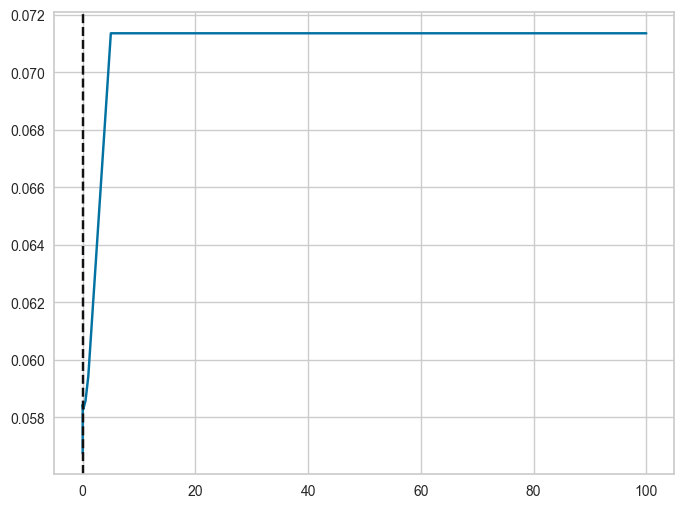

In [20]:
plt.figure(figsize=(8,6))
vis = AlphaSelection(LassoCV(alphas=lambdas));
vis.fit(X_train, y_train);

In [21]:
r2_results = pd.DataFrame({'lr':lr_r2, 'ridge_cv':ridge_cv.best_score_, 'lasso_cv':lasso_r2},index=['CV R2'])

r2_results.loc['Train R2', :] =[r2_score(y_train,lr.predict(X_train)),
                                r2_score(y_train,ridge_cv.predict(X_train)),
                                r2_score(y_train,lasso_cv.predict(X_train))]
r2_results.loc['lambda','lr']=0
r2_results.loc['lambda','ridge_cv']=ridge_cv.alpha_
r2_results.loc['lambda','lasso_cv']=lasso_cv.alpha_
r2_results

/usr/local/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


,lr,ridge_cv,lasso_cv
CV R2,0.215044,0.198922,0.194574
Train R2,0.237407,0.247315,0.244431
lambda,0.000000,0.001000,0.000100


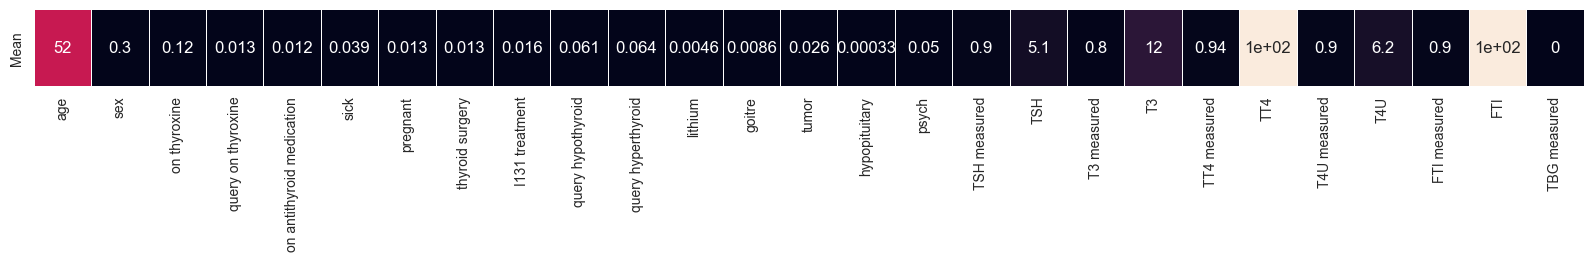

In [23]:
plt.figure(figsize = (20,1));
sns.heatmap(X_train.mean().to_frame().T.rename(index={0:'Mean'}),annot=True, linewidths=.5,cbar=False,xticklabels=True);

### NAÏVE  BAYES

In [32]:

gnb = GaussianNB()
print(np.mean(cross_val_score(gnb,X_train,y_train,cv=10)))

gnb_model = GaussianNB().fit(X_train, y_train)

0.2595949484059757


Este bajo valor de precisión que nos devuelve Naïve Bayes lo atribuyo principalmente a la hora que hemos decidido tratar con los valores NaN que reciben las classes que más peso/correlación tiene en la classificación del hipotiroidismo, puesto que hemos decidido sustituirlos con el valor de su mediana. Además de tratar con los valores desconocidos de la clase 'sex' que hemos decidido clasificarlos con el sexo de mujeres ya que la clase con más instancias con este valor era precisamente el femenino, con etiqueta F.

##### 1ero argumento

df_test['TSH'].fillna(value=df_test['TSH'].mean(), inplace = True) <br>
df_test['T3'].fillna(value=df_test['age'].mean(), inplace = True)  <br>
df_test['TT4'].fillna(value=df_test['age'].mean(), inplace = True) <br>
df_test['T4U'].fillna(value=df_test['age'].mean(), inplace = True) <br> 
df_test['FTI'].fillna(value=df_test['age'].mean(), inplace = True) <br>

##### 2ndo argumento

df_train.replace(to_replace='?', inplace=True, value='F') <br>
df_train['sex'] = df_train['sex'].astype('category').cat.codes <br>

In [33]:
print('Priors:', gnb_model.class_prior_)
print('Means:\n')
means =pd.DataFrame(gnb_model.theta_)
means.columns=X_train.columns
means

Priors: [0.07725464 0.92274536]
Means:



,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured
0,51.412017,0.236052,0.034335,0.012876,0.004292,0.042918,0.000000,0.004292,0.021459,0.141631,...,38.732253,0.841202,9.453384,0.982833,73.069975,0.909871,5.571038,0.909871,71.740866,0.0
1,51.616865,0.309378,0.128279,0.012936,0.012217,0.038807,0.014014,0.013295,0.015092,0.054258,...,2.244431,0.794466,12.241644,0.935322,107.634994,0.896155,6.247943,0.896874,107.352317,0.0


In [34]:
print(classification_report(gnb_model.predict(X_test), y_test,target_names=['P', 'N']))

              precision    recall  f1-score   support

           P       0.98      0.09      0.17       616
           N       0.20      0.99      0.33       139

    accuracy                           0.26       755
   macro avg       0.59      0.54      0.25       755
weighted avg       0.84      0.26      0.20       755



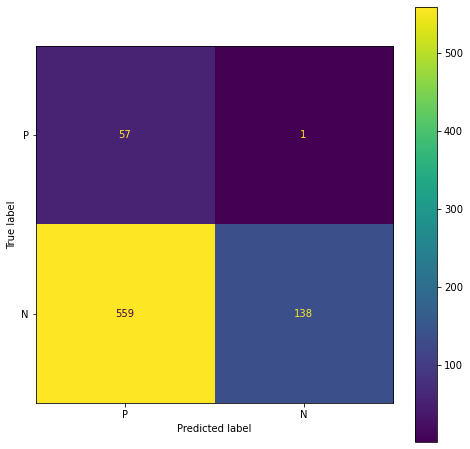

In [35]:

plt.figure(figsize=(8,8));
ConfusionMatrixDisplay.from_estimator(gnb_model, X_test,y_test, display_labels=['P', 'N'], ax=plt.subplot());

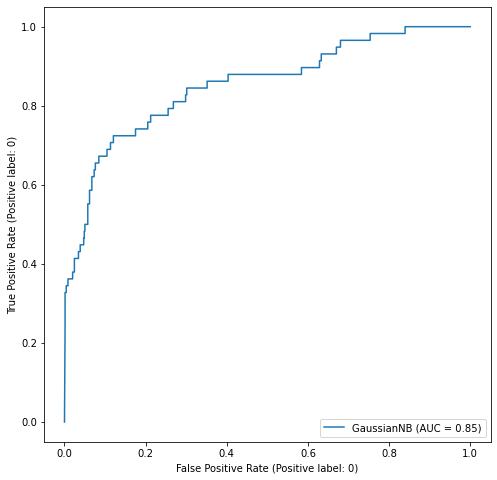

In [36]:
plt.figure(figsize=(8,8));

RocCurveDisplay.from_estimator(gnb_model, X_test,y_test, pos_label=0, ax=plt.subplot());

### KNN

In [63]:
scaler = MinMaxScaler()

X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [65]:
knn =  KNeighborsClassifier()
print(np.mean(cross_val_score(knn,X_train_s,y_train,cv=10)))

0.9343501793139867


In [68]:
param = {'n_neighbors':[1, 2, 3, 4, 5, 7, 9, 11, 13, 15], 
          'weights':['distance', 'uniform'], 
          'leaf_size':[1, 5, 10, 20, 30],
          'metric': ['l2', 'l1', 'cosine']}

knn_gs =  GridSearchCV(knn,param,cv=10, n_jobs=-1)
knn_gs.fit(X_train_s, y_train);

In [69]:
show_html(pd.DataFrame(knn_gs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
147,"{'leaf_size': 10, 'metric': 'l1', 'n_neighbors': 4, 'weights': 'uniform'}",0.942306,1
207,"{'leaf_size': 20, 'metric': 'l1', 'n_neighbors': 4, 'weights': 'uniform'}",0.942306,1
27,"{'leaf_size': 1, 'metric': 'l1', 'n_neighbors': 4, 'weights': 'uniform'}",0.942306,1
267,"{'leaf_size': 30, 'metric': 'l1', 'n_neighbors': 4, 'weights': 'uniform'}",0.942306,1
87,"{'leaf_size': 5, 'metric': 'l1', 'n_neighbors': 4, 'weights': 'uniform'}",0.942306,1


In [70]:
print(classification_report(knn_gs.predict(X_test_s), y_test,target_names=['P', 'N']))

              precision    recall  f1-score   support

           P       0.31      0.62      0.41        29
           N       0.98      0.94      0.96       726

    accuracy                           0.93       755
   macro avg       0.65      0.78      0.69       755
weighted avg       0.96      0.93      0.94       755



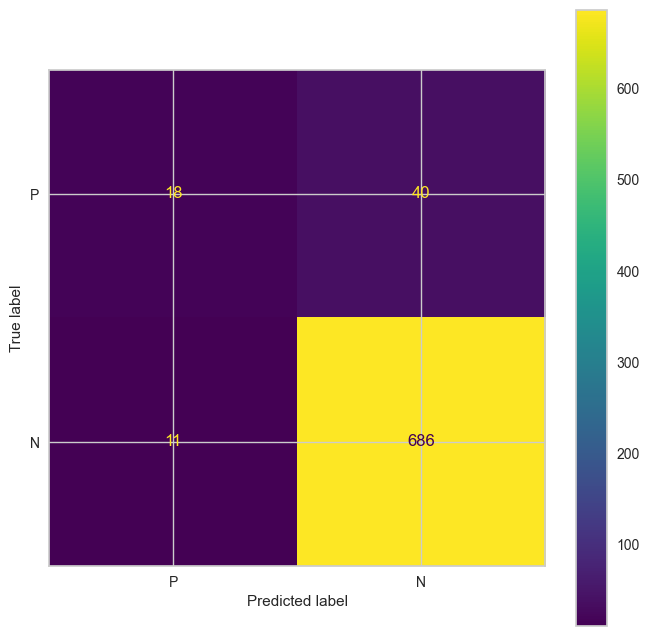

In [71]:
cls = ['P', 'N']
plt.figure(figsize=(8,8));
ConfusionMatrixDisplay.from_estimator(knn_gs, X_test_s,y_test, display_labels=cls, ax=plt.subplot());

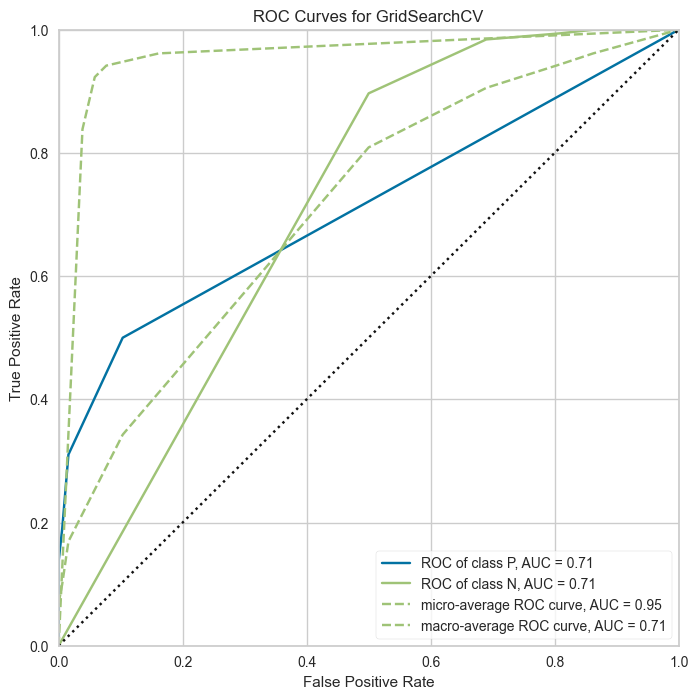

In [73]:

plt.figure(figsize=(8,8));
roc_auc(knn_gs, X_train_s, y_train, X_test_s, y_test, classes=cls);

In [78]:
c = choice(X_test.shape[0], size=100, replace=False)
pi = permutation_importance(knn_gs,X_test_s[c], y_test.to_numpy()[c], n_jobs=-1, random_state=0)
var_imp = pd.DataFrame({'importance': pi.importances_mean}, index=X_train.columns[:])

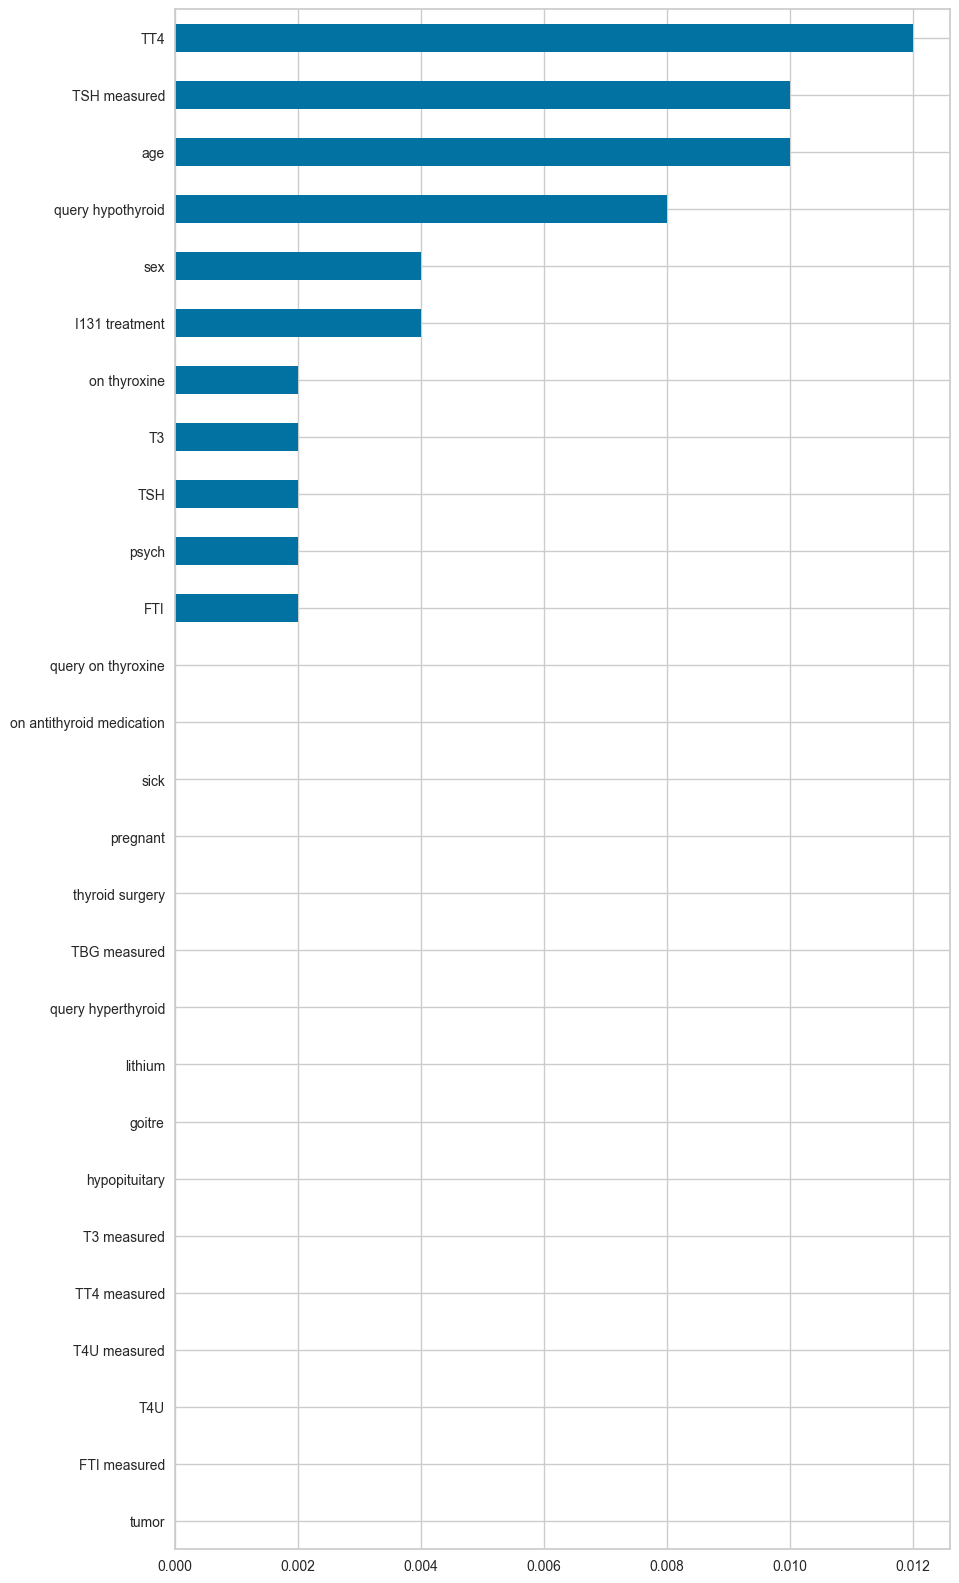

In [79]:
var_imp.sort_values(by='importance').plot.barh(figsize=(10,20), legend=False);

### MLP

In [81]:
#Conseguimos el csv de entrenamiento
X_train = read_csv('df_train.csv')
y_train = X_train['binaryClass']

X_train.drop('binaryClass', axis=1, inplace = True)

X_train
y_train

#Conseguimos el csv de test
X_test = read_csv('df_test.csv')
y_test = X_test['binaryClass']

X_test.drop('binaryClass', axis=1, inplace = True)

X_test
y_test

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured
0,65.0,0,1,0,0,0,0,0,0,0,...,0.400,0,51.601039,1,175.0,1,1.12,1,156.0,0
1,62.0,0,0,0,0,1,0,0,0,0,...,11.000,1,0.800000,1,73.0,1,0.74,1,98.0,0
2,27.0,0,0,0,0,0,0,0,0,0,...,1.700,1,1.900000,1,146.0,1,1.19,1,123.0,0
3,80.0,0,0,0,0,0,0,0,0,0,...,2.600,1,2.200000,1,97.0,1,1.04,1,94.0,0
4,28.0,0,0,0,1,0,0,0,0,0,...,0.300,1,2.900000,1,171.0,1,1.20,1,143.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3011,60.0,0,0,0,0,0,0,0,0,0,...,2.100,0,51.601039,1,127.0,1,1.01,1,126.0,0
3012,25.0,0,0,0,0,0,0,0,0,0,...,0.700,1,1.600000,1,94.0,1,0.93,1,101.0,0
3013,65.0,0,1,0,0,0,0,0,0,0,...,0.015,1,3.100000,1,168.0,1,0.98,1,171.0,0
3014,73.0,0,1,0,0,0,0,0,0,1,...,0.030,1,1.700000,1,127.0,1,0.89,1,143.0,0


0       1
1       0
2       1
3       1
4       1
       ..
3011    1
3012    1
3013    1
3014    1
3015    1
Name: binaryClass, Length: 3016, dtype: int64

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured
0,26.0,0,0,0,0,0,0,0,0,0,...,2.10,1,2.200000,1,95.0,1,1.000000,1,95.000000,0
1,26.0,0,0,0,0,0,0,0,0,0,...,6.20,0,51.740397,1,86.0,1,0.900000,1,95.000000,0
2,52.0,1,1,0,0,0,0,0,0,0,...,0.20,1,2.300000,1,116.0,1,0.940000,1,123.000000,0
3,25.0,0,0,0,0,0,0,0,0,0,...,2.00,1,2.200000,1,123.0,1,1.520000,1,81.000000,0
4,29.0,0,0,0,0,0,0,0,0,0,...,0.84,1,1.500000,1,100.0,1,0.740000,1,135.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,29.0,0,0,0,0,0,0,0,0,0,...,4.60,1,1.600000,1,97.0,1,1.120000,1,87.000000,0
751,28.0,0,0,0,0,0,0,0,0,0,...,3.40,1,1.900000,1,86.0,0,51.740397,0,51.740397,0
752,72.0,0,0,0,0,0,0,0,0,1,...,1.10,0,51.740397,1,131.0,1,0.500000,1,265.000000,0
753,35.0,0,1,0,0,0,0,0,0,0,...,1.90,1,1.800000,1,100.0,1,0.810000,1,123.000000,0


0      1
1      0
2      1
3      1
4      1
      ..
750    1
751    1
752    1
753    1
754    1
Name: binaryClass, Length: 755, dtype: int64

In [82]:
sdscaler = StandardScaler()

X_train_sd = sdscaler.fit_transform(X_train)
X_test_sd = sdscaler.transform(X_test)

In [83]:
mlp = MLPClassifier(max_iter=10000, early_stopping=True, n_iter_no_change=15, random_state=42)
print(np.mean(cross_val_score(mlp,X_train_sd,y_train,cv=10)))

0.9469505621438472


In [84]:

param = {'hidden_layer_sizes':[10, 50, 100, 200], 
         'activation':['relu', 'logistic', 'identity'], 
         'learning_rate_init': [0.001, 0.01, 0.1]  }

mlp =  MLPClassifier(max_iter=10000, early_stopping=True, n_iter_no_change=20,learning_rate='adaptive',random_state=42)
mlp_gs =  GridSearchCV(mlp,param,cv=10, n_jobs=-1, refit=True)
mlp_gs.fit(X_train_sd, y_train);

In [85]:
show_html(pd.DataFrame(mlp_gs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
2,"{'activation': 'relu', 'hidden_layer_sizes': 10, 'learning_rate_init': 0.1}",0.986073,1
8,"{'activation': 'relu', 'hidden_layer_sizes': 100, 'learning_rate_init': 0.1}",0.984417,2
23,"{'activation': 'logistic', 'hidden_layer_sizes': 200, 'learning_rate_init': 0.1}",0.984084,3
10,"{'activation': 'relu', 'hidden_layer_sizes': 200, 'learning_rate_init': 0.01}",0.983753,4
4,"{'activation': 'relu', 'hidden_layer_sizes': 50, 'learning_rate_init': 0.01}",0.983089,5


In [86]:

param = {'hidden_layer_sizes':[10, 50, 100, 200, 300], 
'activation':['relu', 'identity', 'logistic'], 
'alpha':[0.0001, 0.001, 0.01],
'momentum': [0.95, 0.90, 0.85, 0.8], 
'learning_rate_init': [0.001, 0.01, 0.1],
'n_iter_no_change':[10, 20, 40, 50], 
'learning_rate': ['constant', 'invscaling', 'adaptive']}

mlp =  MLPClassifier(max_iter=10000,early_stopping=True,random_state=0)
mlp_bs =  BayesSearchCV(mlp,param,
                        n_iter=15, 
                        cv=10, n_jobs=-1, 
                        refit=True,random_state=0)
mlp_bs.fit(X_train_sd, y_train);

In [87]:
show_html(pd.DataFrame(mlp_bs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
11,"{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': 300, 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'momentum': 0.8, 'n_iter_no_change': 40}",0.982757,1
13,"{'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': 50, 'learning_rate': 'adaptive', 'learning_rate_init': 0.1, 'momentum': 0.85, 'n_iter_no_change': 40}",0.982095,2
5,"{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': 200, 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'momentum': 0.85, 'n_iter_no_change': 50}",0.982092,3
14,"{'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': 200, 'learning_rate': 'invscaling', 'learning_rate_init': 0.1, 'momentum': 0.8, 'n_iter_no_change': 20}",0.981762,4
0,"{'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': 100, 'learning_rate': 'constant', 'learning_rate_init': 0.1, 'momentum': 0.95, 'n_iter_no_change': 10}",0.980764,5


In [88]:
print(classification_report(mlp_gs.predict(X_test_sd), y_test,target_names=cls))

              precision    recall  f1-score   support

           P       0.95      0.93      0.94        59
           N       0.99      1.00      0.99       696

    accuracy                           0.99       755
   macro avg       0.97      0.96      0.97       755
weighted avg       0.99      0.99      0.99       755



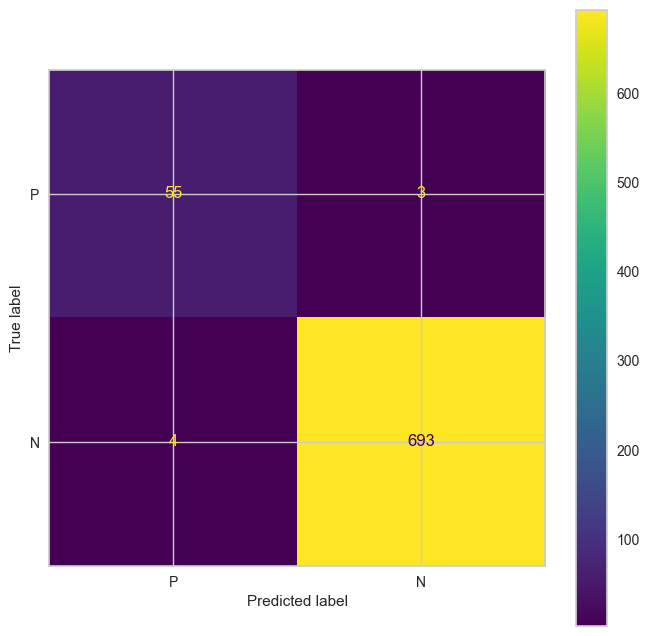

In [91]:
plt.figure(figsize=(8,8));
ConfusionMatrixDisplay.from_estimator(mlp_gs, X_test_sd,y_test, display_labels=cls, ax=plt.subplot());

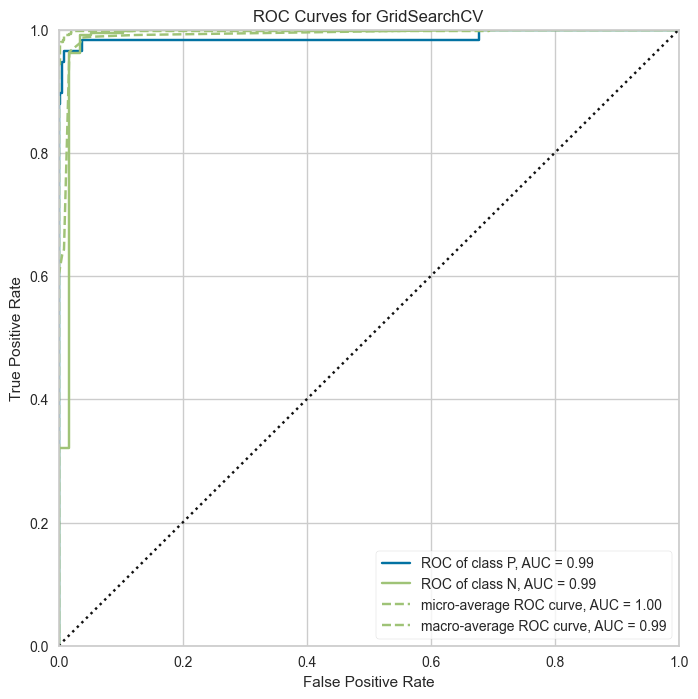

In [93]:
plt.figure(figsize=(8,8));
roc_auc(mlp_gs, X_train_sd, y_train, X_test_sd, y_test, classes=cls);

In [98]:
c = choice(X_test.shape[0], size=100, replace=False)
pi = permutation_importance(mlp_bs,X_test_sd[c], y_test.to_numpy()[c], n_jobs=-1, random_state=42)
var_imp = pd.DataFrame({'importance': pi.importances_mean},
                       index=X_train.columns[:])

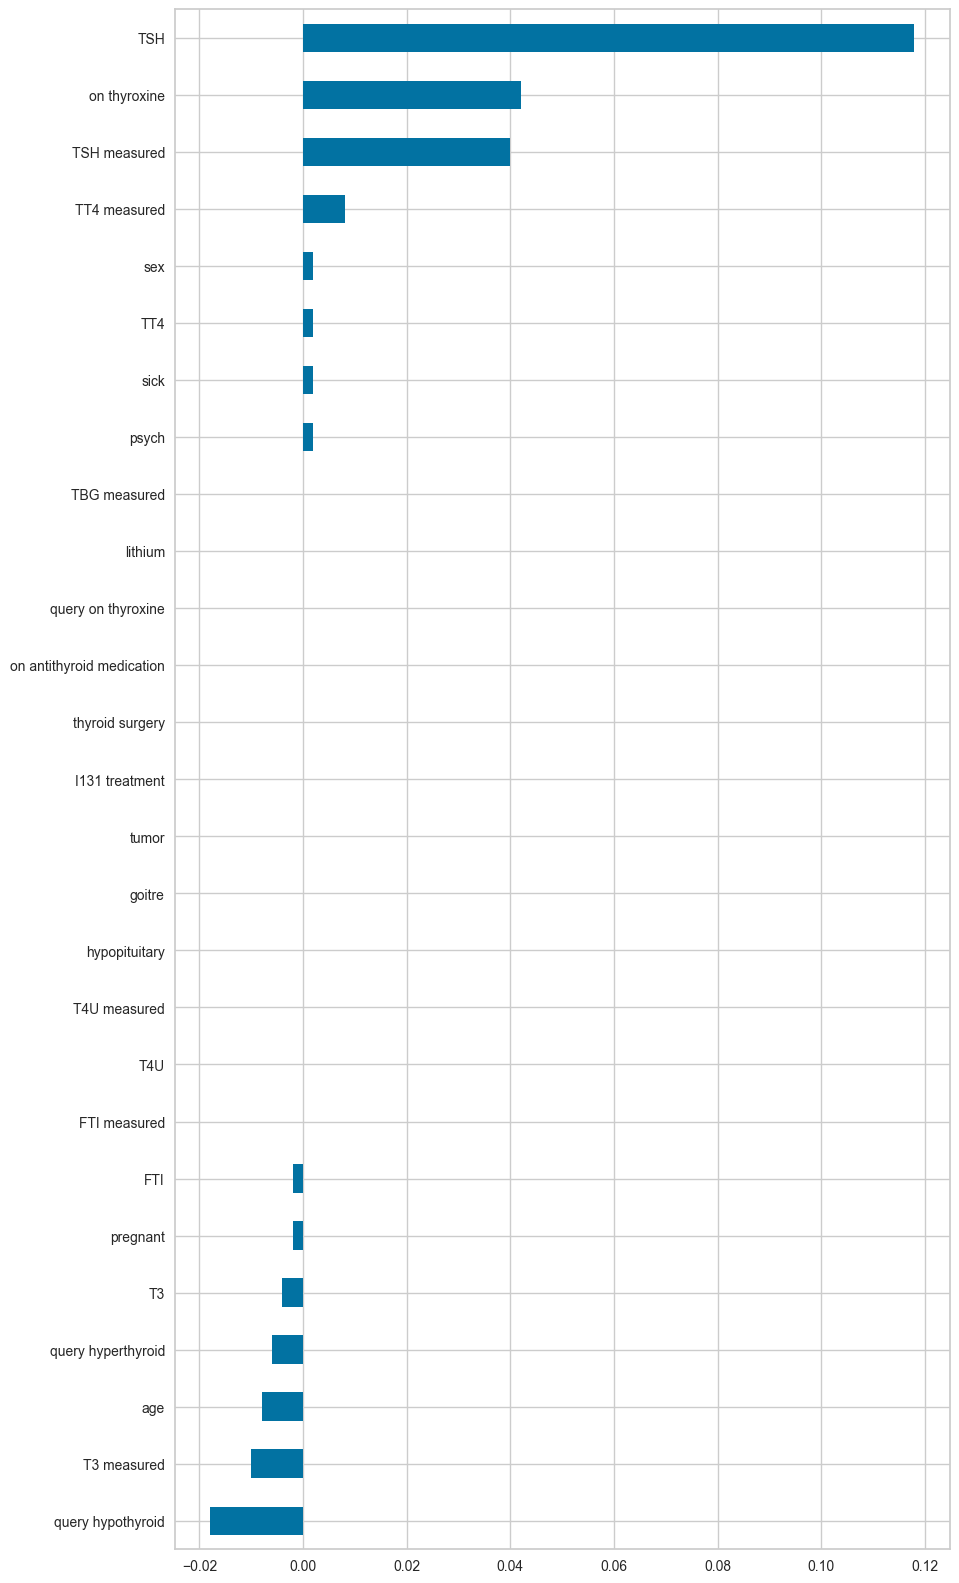

In [99]:
var_imp.sort_values(by='importance').plot.barh(figsize=(10,20), legend=False);

In [89]:
print(classification_report(mlp_bs.predict(X_test_sd), y_test,target_names=cls))

              precision    recall  f1-score   support

           P       0.90      0.95      0.92        55
           N       1.00      0.99      0.99       700

    accuracy                           0.99       755
   macro avg       0.95      0.97      0.96       755
weighted avg       0.99      0.99      0.99       755



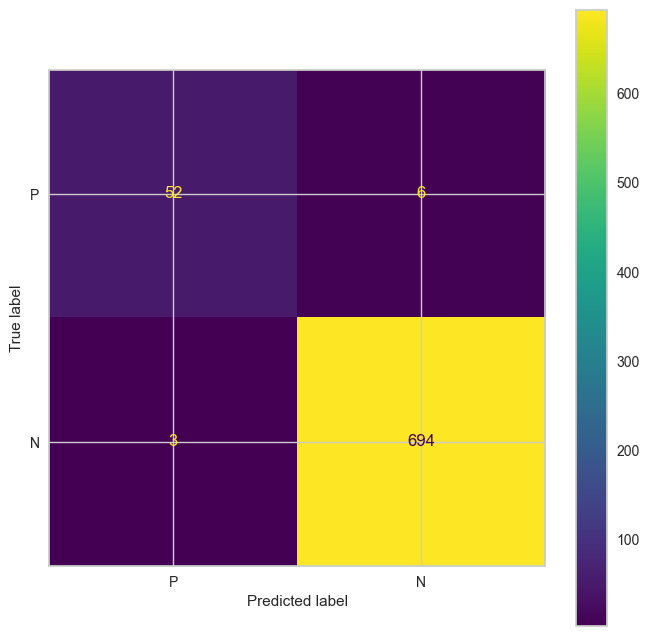

In [90]:
plt.figure(figsize=(8,8));
ConfusionMatrixDisplay.from_estimator(mlp_bs, X_test_sd,y_test, display_labels=cls, ax=plt.subplot());

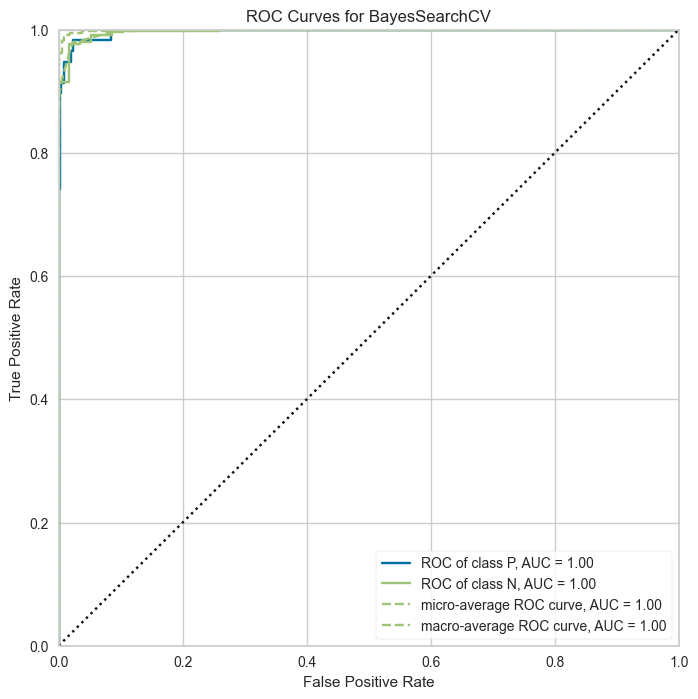

In [92]:
plt.figure(figsize=(8,8));
roc_auc(mlp_bs, X_train_sd, y_train, X_test_sd, y_test, classes=cls);

In [100]:
c = choice(X_test.shape[0], size=100, replace=False)
pi = permutation_importance(mlp_bs,X_test_sd[c], y_test.to_numpy()[c], n_jobs=-1, random_state=42)
var_imp = pd.DataFrame({'importance': pi.importances_mean},
                       index=X_train.columns[:])

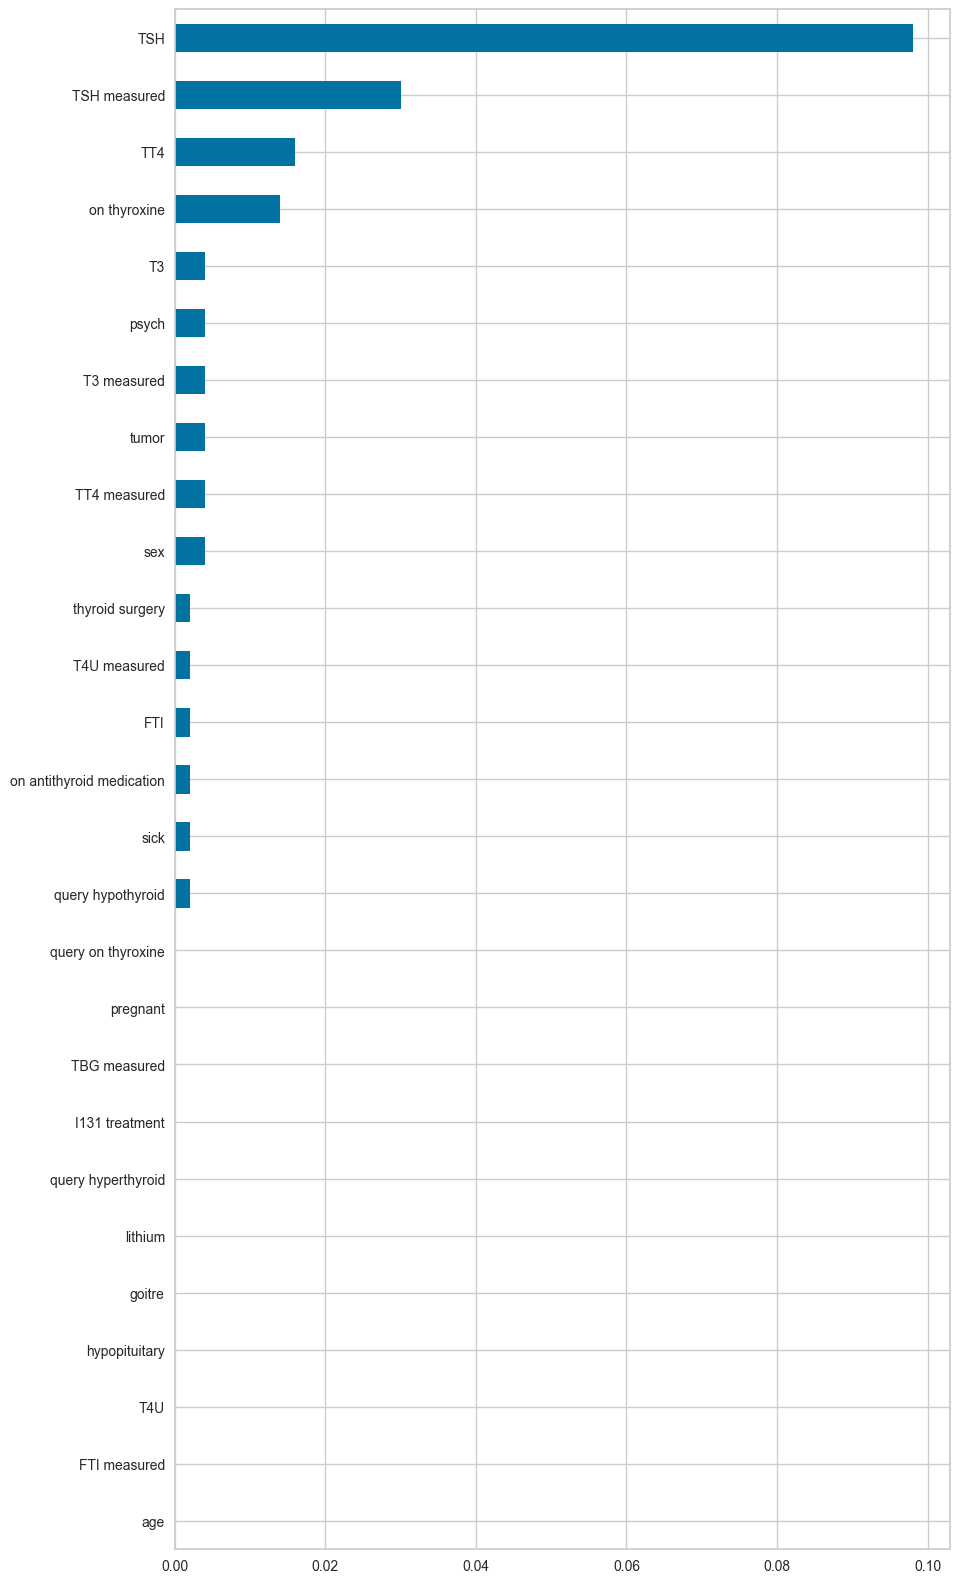

In [101]:
var_imp.sort_values(by='importance').plot.barh(figsize=(10,20), legend=False);

### SVM - lineal

In [116]:

param = {'C':10**np.linspace(-4,4,101)}

lsvc =  SVC(kernel='linear', max_iter=25000000, random_state=42)
lsvc_gs = BayesSearchCV(lsvc,param,n_iter=15, cv=5, n_jobs=-1, refit=True, random_state=42)
lsvc_gs.fit(X_train, y_train);

/usr/local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=25000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=25000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=25000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=25000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=

/usr/local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=25000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=25000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=25000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=25000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=

In [117]:
show_html(pd.DataFrame(lsvc_gs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
8,{'C': 4786.30092322638},0.977122,1
12,{'C': 4786.30092322638},0.977122,1
11,{'C': 39.81071705534978},0.976791,3
5,{'C': 69.18309709189363},0.975464,4
6,{'C': 9.120108393559097},0.972481,5


In [118]:
clases = [str(v) for v in sorted(np.unique(y_train))]
clases

print(classification_report(lsvc_gs.predict(X_test), y_test,target_names=clases))

['0', '1']

              precision    recall  f1-score   support

           0       0.43      0.83      0.57        30
           1       0.99      0.95      0.97       725

    accuracy                           0.95       755
   macro avg       0.71      0.89      0.77       755
weighted avg       0.97      0.95      0.96       755



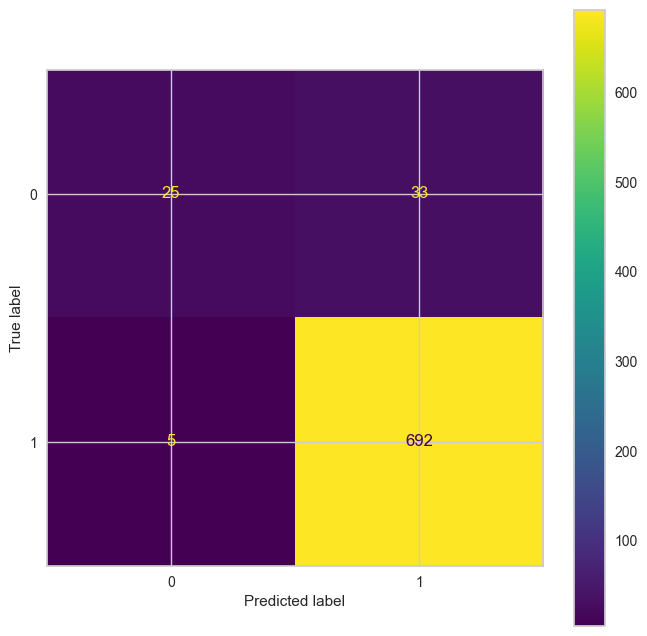

In [119]:
plt.figure(figsize=(8,8));
ConfusionMatrixDisplay.from_estimator(lsvc_gs, X_test, y_test, display_labels=clases, ax=plt.subplot());

In [137]:
plt.figure(figsize=(8,8));
roc_auc(lsvc_gs, X_train, y_train, X_test, y_test);

/usr/local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


ModelError: no curves will be drawn; set binary=True.

<Figure size 800x800 with 0 Axes>

### SVM con kernel polinómico no-lineal

In [124]:
param = {'C':10**np.linspace(-4,4,101), 'degree':[2,3]}

psvc =  SVC(kernel='poly', max_iter=25000, random_state=0)
psvc_gs = BayesSearchCV(psvc,param,n_iter=15, cv=5, n_jobs=-1, refit=True, random_state=0)
psvc_gs.fit(X_train, y_train);

/usr/local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=25000).  Con

In [125]:
show_html(pd.DataFrame(psvc_gs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
6,"{'C': 5754.399373371566, 'degree': 3}",0.967176,1
5,"{'C': 524.8074602497722, 'degree': 3}",0.963526,2
13,"{'C': 69.18309709189363, 'degree': 3}",0.957227,3
14,"{'C': 10000.0, 'degree': 3}",0.955902,4
11,"{'C': 120.22644346174131, 'degree': 2}",0.953250,5


In [126]:
print(classification_report(psvc_gs.predict(X_test), y_test,target_names=clases))

              precision    recall  f1-score   support

           0       0.72      0.55      0.63        76
           1       0.95      0.98      0.96       679

    accuracy                           0.93       755
   macro avg       0.84      0.76      0.80       755
weighted avg       0.93      0.93      0.93       755



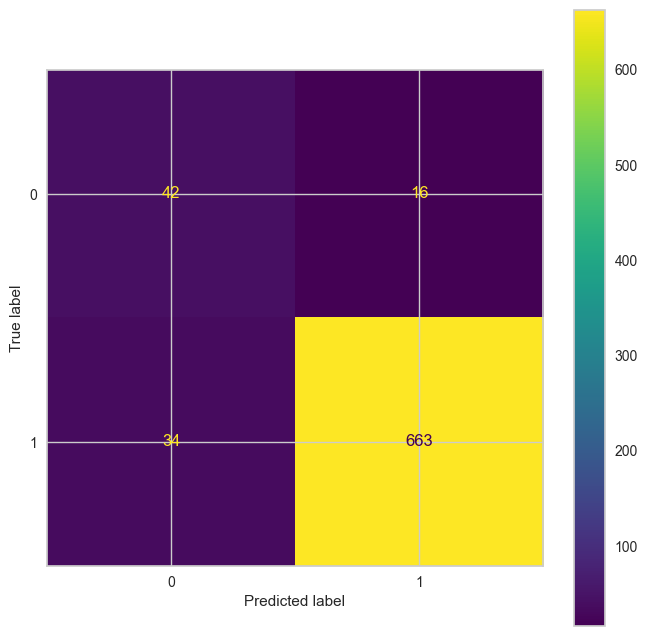

In [127]:
plt.figure(figsize=(8,8));
ConfusionMatrixDisplay.from_estimator(psvc_gs, X_test, y_test, display_labels=clases, ax=plt.subplot());

In [136]:
plt.figure(figsize=(8,8));
roc_auc(psvc_gs, X_train, y_train, X_test, y_test);

/usr/local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


ModelError: no curves will be drawn; set binary=True.

<Figure size 800x800 with 0 Axes>

### SVM con kernel rbf no-lineal

In [131]:
param = {'C':10**np.linspace(-4,4,101), 'gamma':['scale','auto']}

rbsvc =  SVC(kernel='rbf', max_iter=25000, random_state=0)
rbsvc_gs = BayesSearchCV(rbsvc,param,n_iter=15, cv=5, n_jobs=-1, refit=True, random_state=42)
rbsvc_gs.fit(X_train, y_train);

/usr/local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=25000).  Con

In [132]:
show_html(pd.DataFrame(rbsvc_gs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
8,"{'C': 4786.30092322638, 'gamma': 'scale'}",0.976127,1
10,"{'C': 4786.30092322638, 'gamma': 'scale'}",0.976127,1
1,"{'C': 524.8074602497722, 'gamma': 'scale'}",0.969827,3
5,"{'C': 69.18309709189363, 'gamma': 'scale'}",0.959550,4
6,"{'C': 9.120108393559097, 'gamma': 'scale'}",0.950930,5


In [133]:
print(classification_report(rbsvc_gs.predict(X_test), y_test,target_names=clases))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        49
           1       1.00      0.98      0.99       706

    accuracy                           0.98       755
   macro avg       0.89      0.96      0.92       755
weighted avg       0.98      0.98      0.98       755



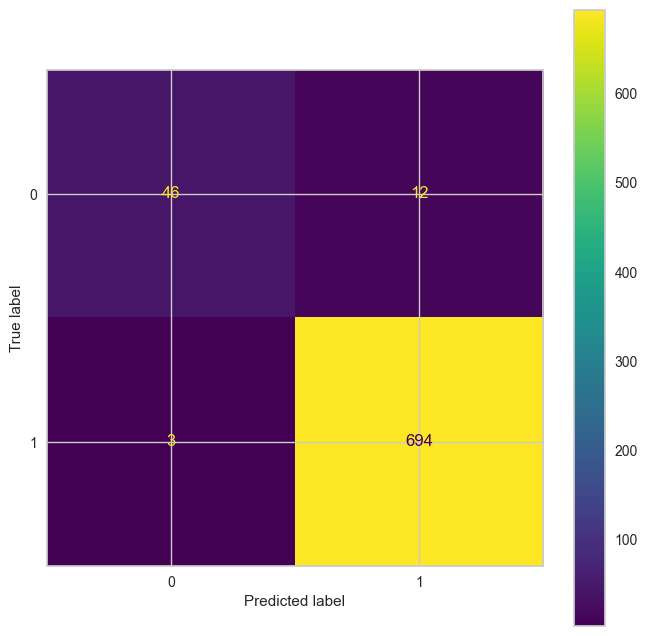

In [134]:
plt.figure(figsize=(8,8));
ConfusionMatrixDisplay.from_estimator(rbsvc_gs, X_test, y_test, display_labels=clases, ax=plt.subplot());

In [135]:
plt.figure(figsize=(8,8));
roc_auc(rbsvc_gs, X_train, y_train, X_test, y_test);

/usr/local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


ModelError: no curves will be drawn; set binary=True.

<Figure size 800x800 with 0 Axes>

### Random Forest

In [162]:

rf = RandomForestClassifier(random_state=42)

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 20000, num = 100)]

param = [{'n_estimators': n_estimators,
          'max_depth': list(range(0, 2000)), 
          'max_features': ['auto','sqrt','log2'], 
          'min_samples_split': list(range(0, 2000)), 
          'criterion': ['gini', 'entropy'],
         'bootstrap': [True,False]}]

rf.fit(X_train,y_train);

In [163]:
print(np.mean(cross_val_score(rf,X_train,y_train,cv=10)))
#0.9943642604123122

0.9943642604123122


In [155]:
print(classification_report(rf.predict(X_test), y_test,target_names=['P', 'N']))

              precision    recall  f1-score   support

           P       0.97      0.98      0.97        57
           N       1.00      1.00      1.00       698

    accuracy                           1.00       755
   macro avg       0.98      0.99      0.99       755
weighted avg       1.00      1.00      1.00       755



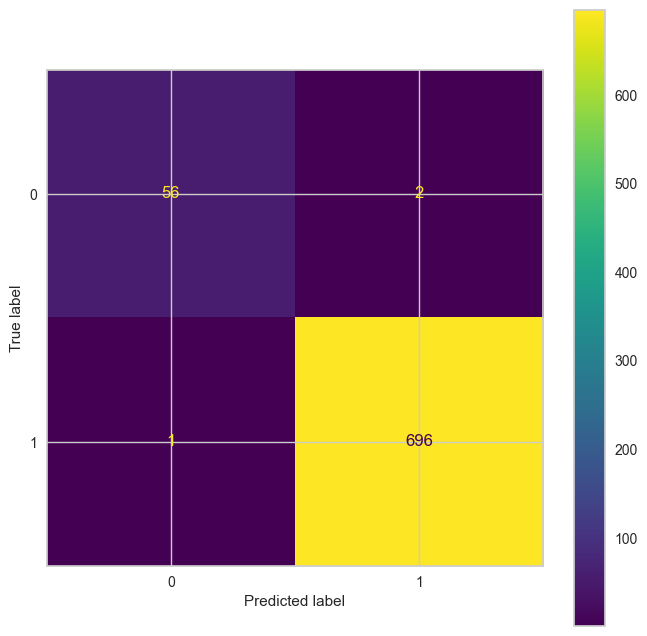

In [156]:
plt.figure(figsize=(8,8));
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, display_labels=clases, ax=plt.subplot());

/usr/local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


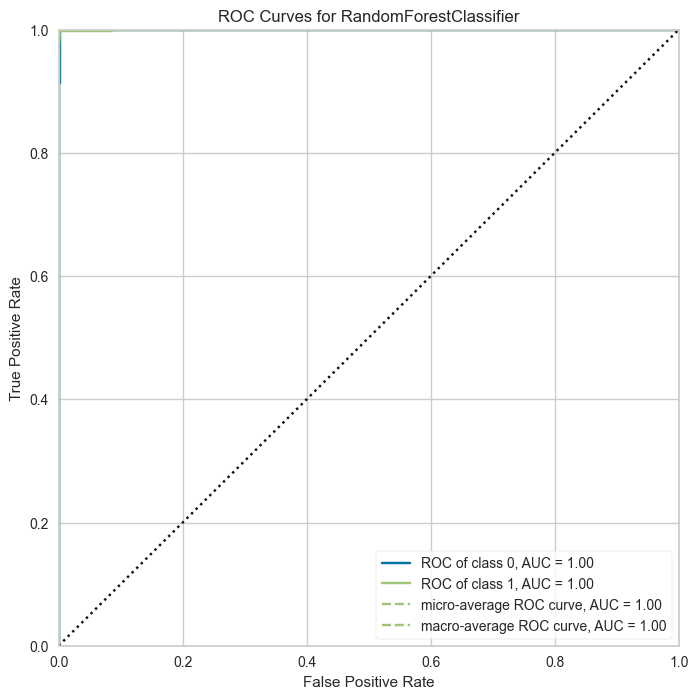

In [157]:
plt.figure(figsize=(8,8));
roc_auc(rf, X_train, y_train, X_test, y_test);